Abtract:visual database 01


In [3]:
import pandas as pd
db=pd.read_csv("../../data/processed/database01_drop_duplicates.csv")

In [4]:
#code để save hình vẽ
from pathlib import Path
IMAGES_PATH = Path() / "../../data" / "img"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
import matplotlib.pyplot as plt
def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

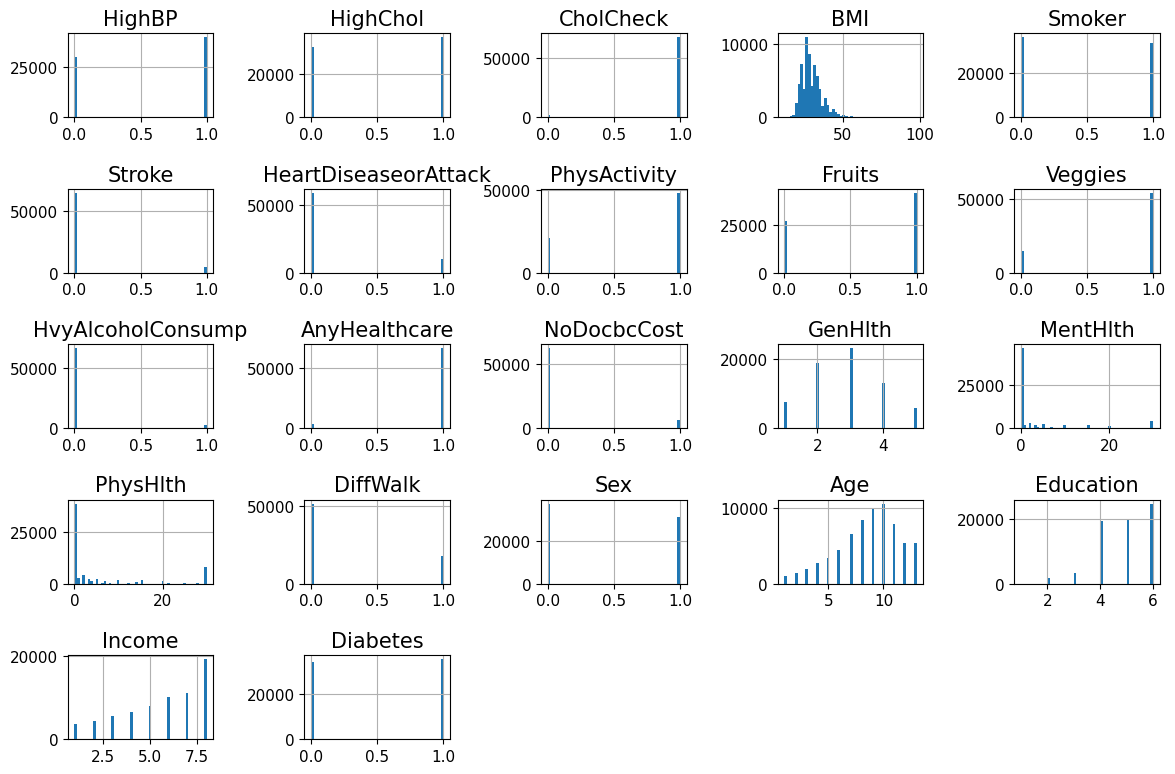

In [4]:
#VISUAL tất cả feature
plt.rc('font',size=15)
plt.rc('axes',labelsize=15,titlesize=15)
plt.rc('legend',fontsize=15)
plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=11)
# Vẽ biểu đồ histogram cho tất cả các cột của DataFrame 'db'
db.hist(bins=50,figsize=(12,8))
save_fig("features_plot")
plt.show()


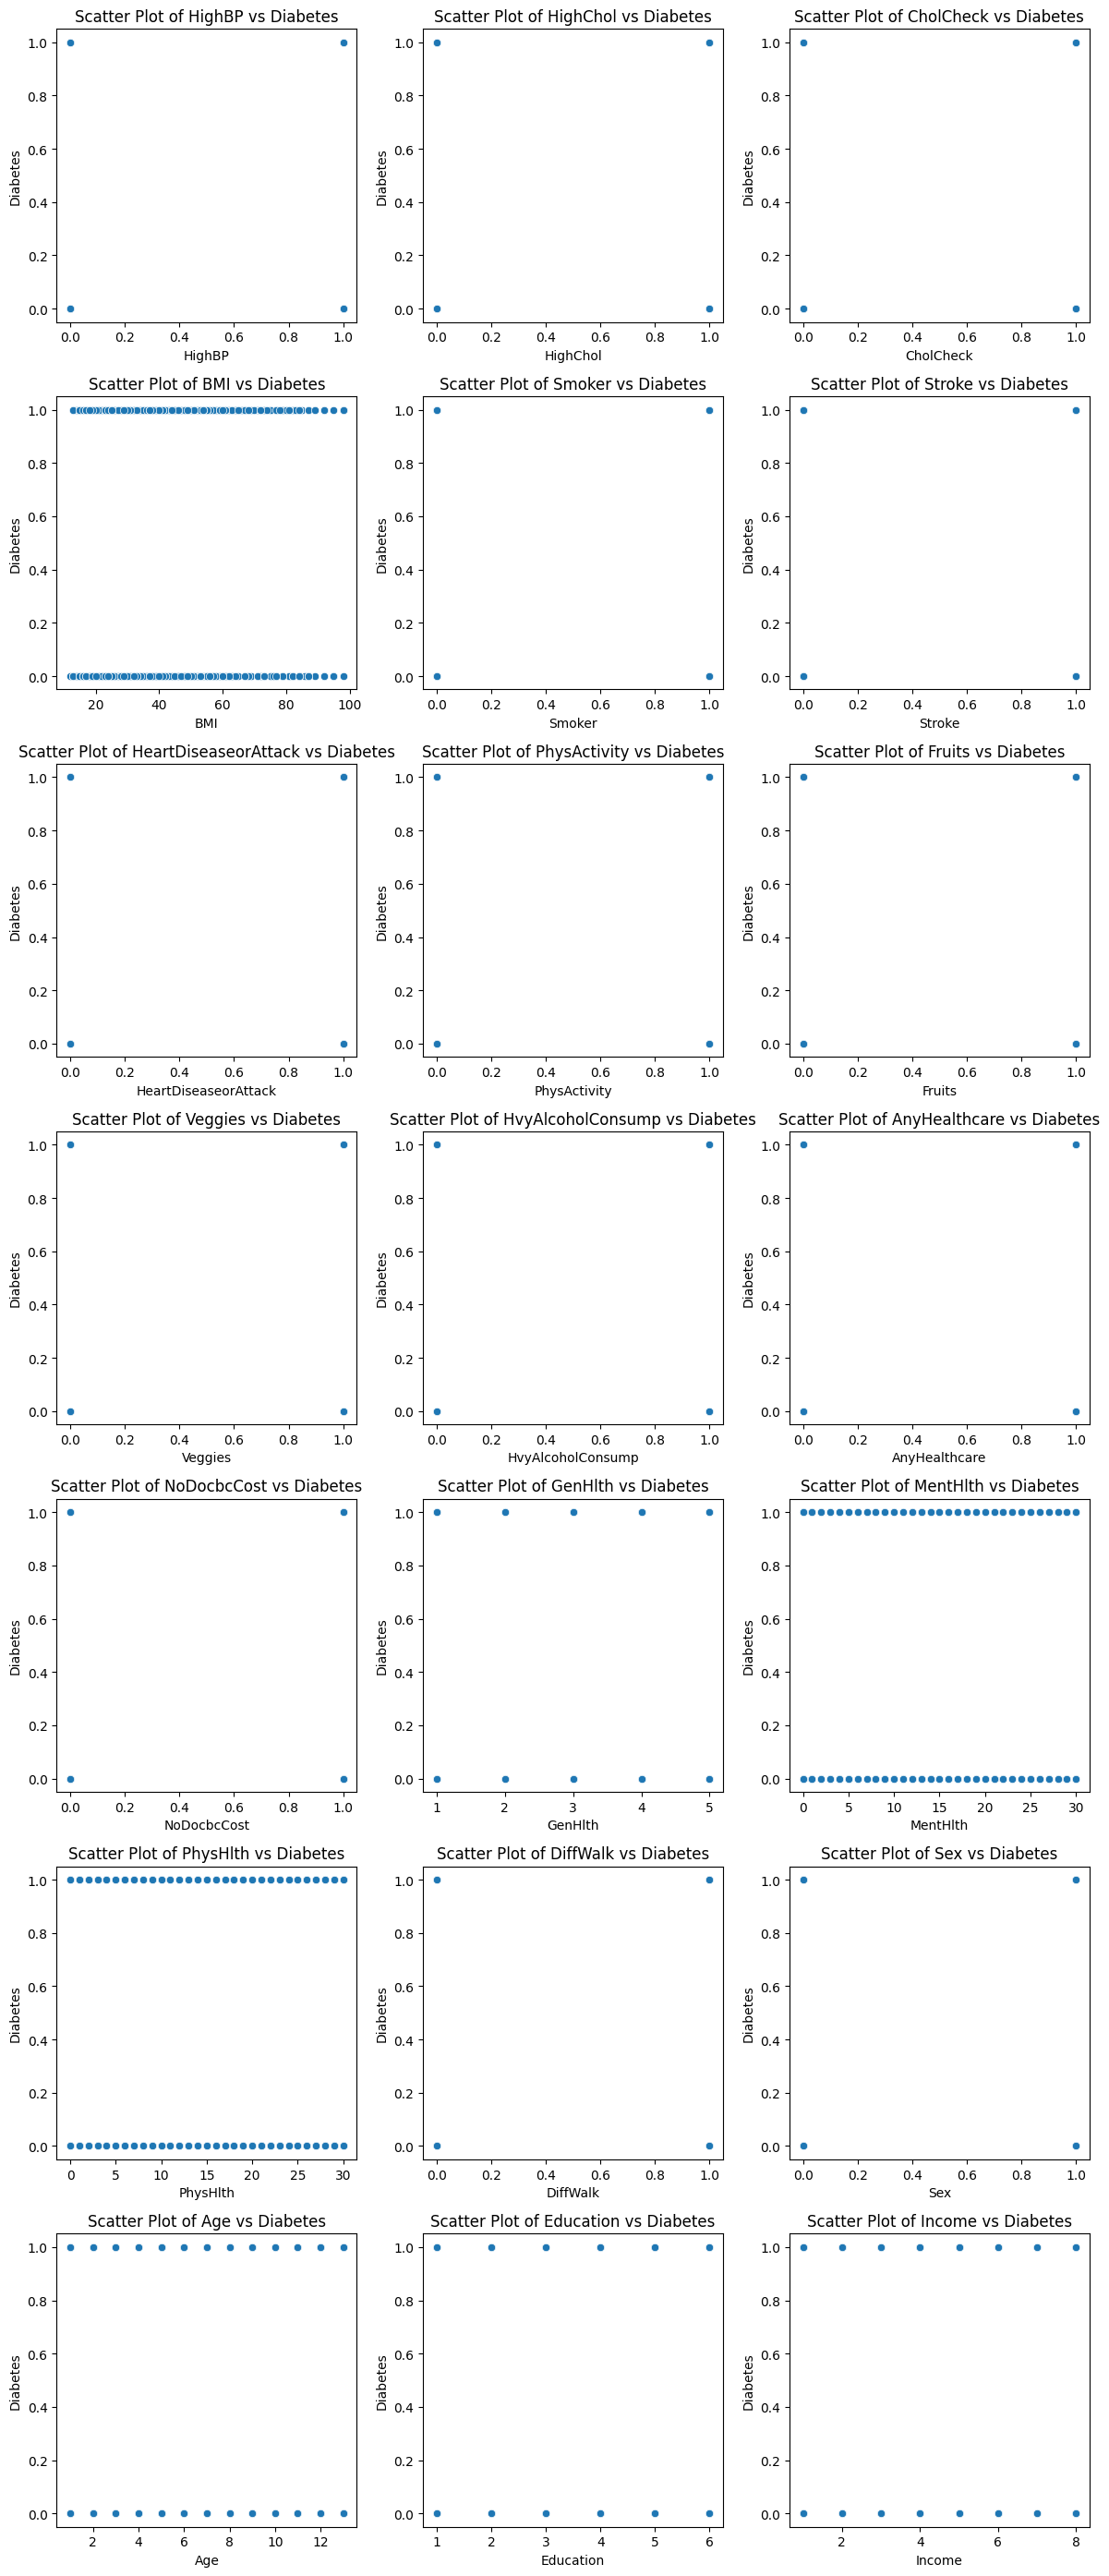

In [15]:
import seaborn as sns
#detect outlier
cols = 3 
rows = (21 + cols - 1) // cols  
plt.figure(figsize=(12, rows*4))
features = db.columns[:-1]

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=db, x=feature, y='Diabetes')
    plt.title(f'Scatter Plot of {feature} vs Diabetes')
plt.tight_layout()
save_fig("detect outlier with diabetes")
plt.show()

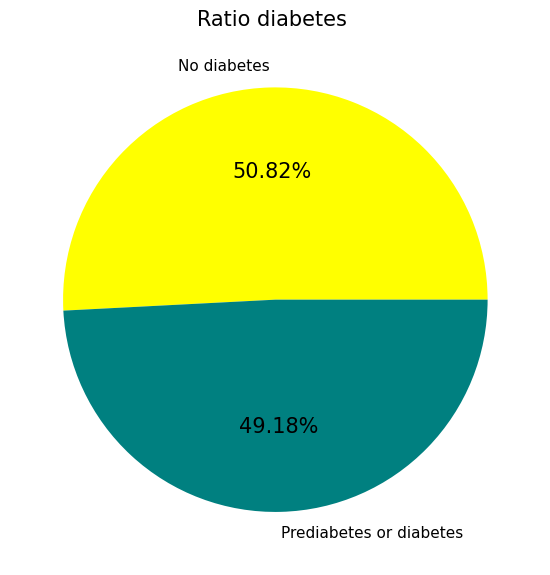

In [9]:
##visual pie chart for feature 
plt.figure(figsize=(10,6))
plt.pie(db['Diabetes'].value_counts(),labels=['No diabetes','Prediabetes or diabetes']
        ,autopct='%1.2f%%',colors=['yellow','teal'])
plt.title('Ratio diabetes ')
save_fig("plotPie_ratio_diabetes")
plt.show()

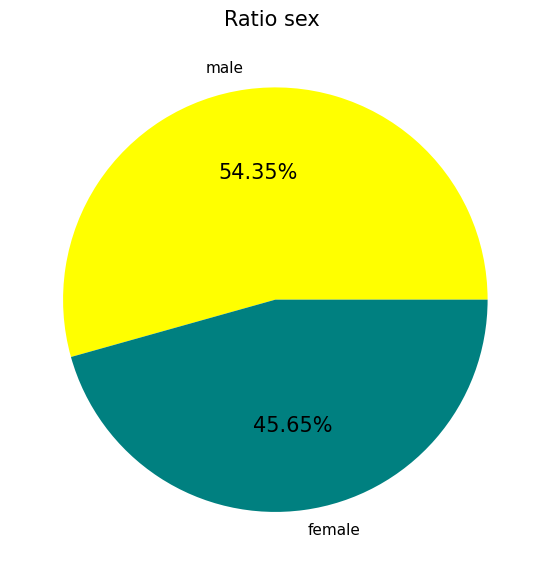

In [10]:
#Sex
plt.figure(figsize=(10,6))
plt.pie(db['Sex'].value_counts(),labels=['male','female']
        ,autopct='%1.2f%%',colors=['yellow','teal'])
plt.title('Ratio sex ')
save_fig("plotPie_ratio_sex")
plt.show()

In [2]:
from ydata_profiling import ProfileReport
profile = ProfileReport(db)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

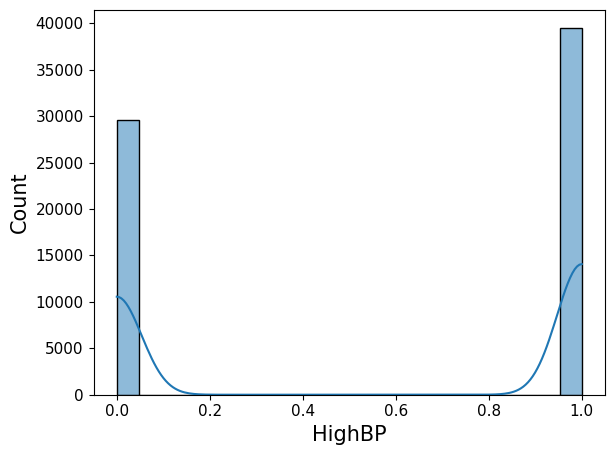

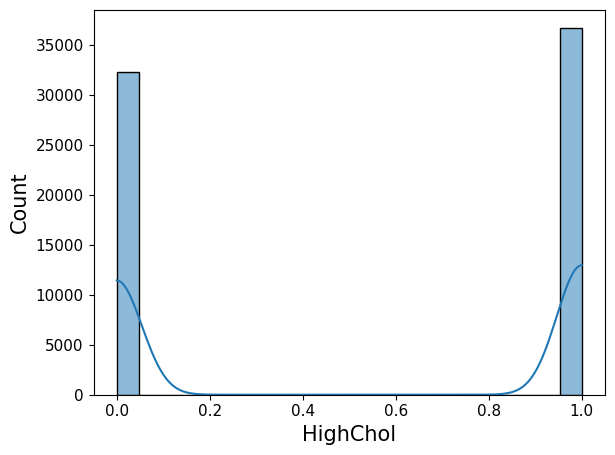

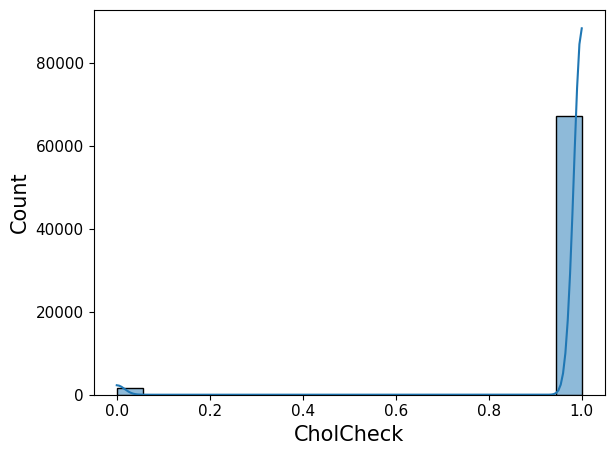

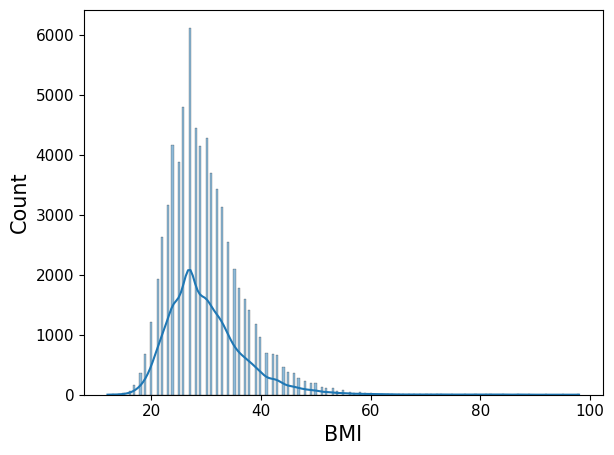

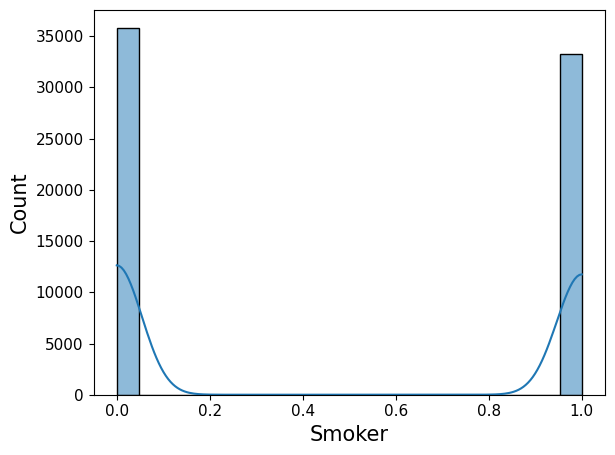

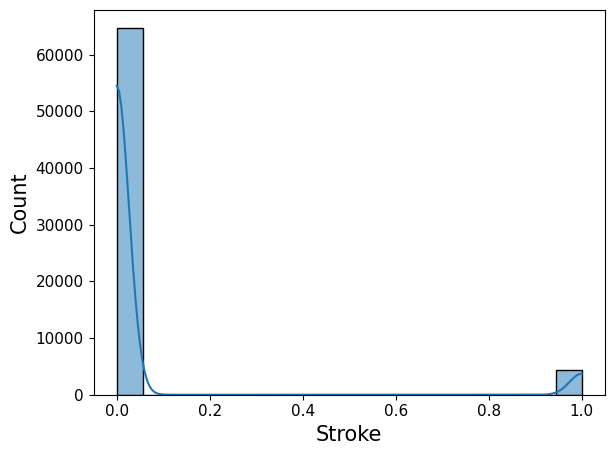

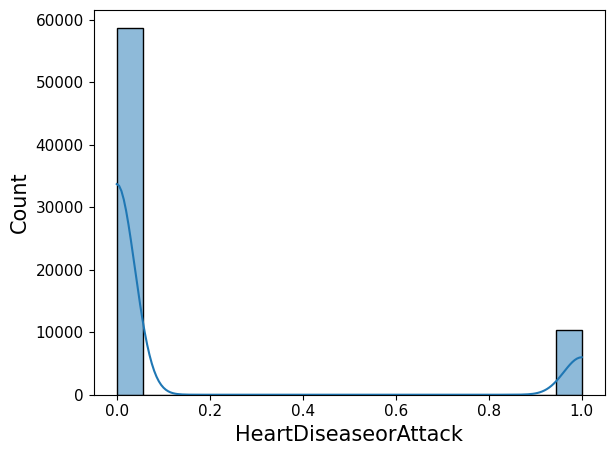

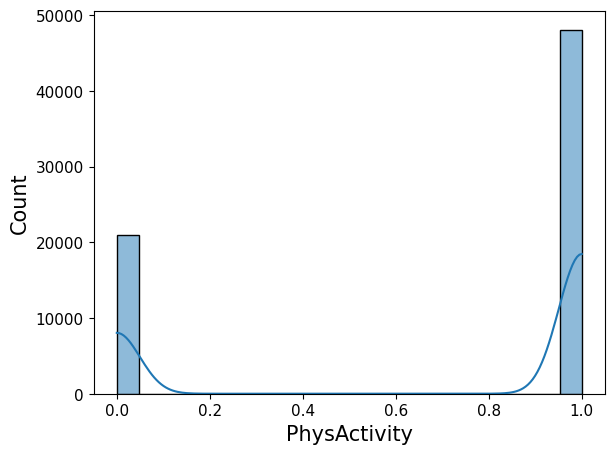

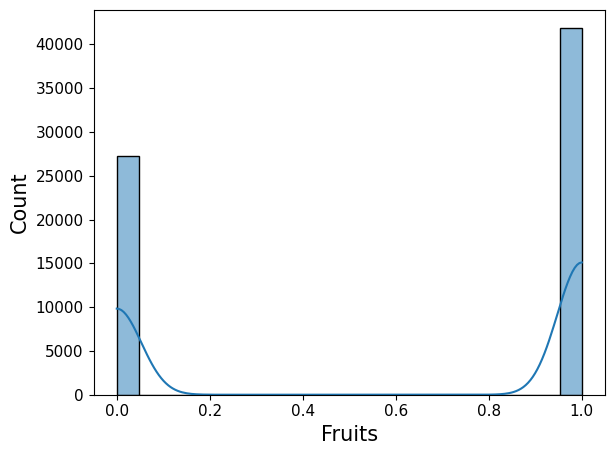

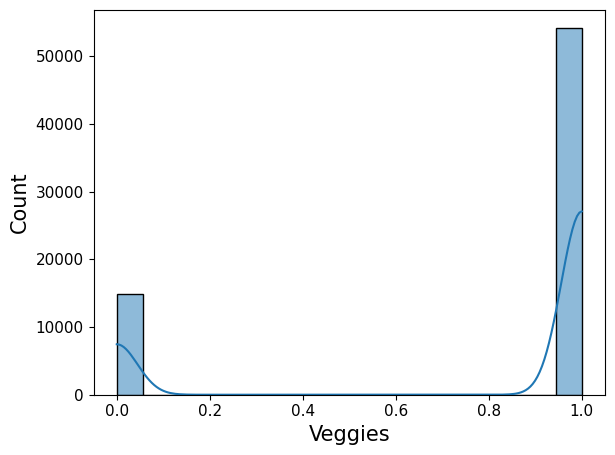

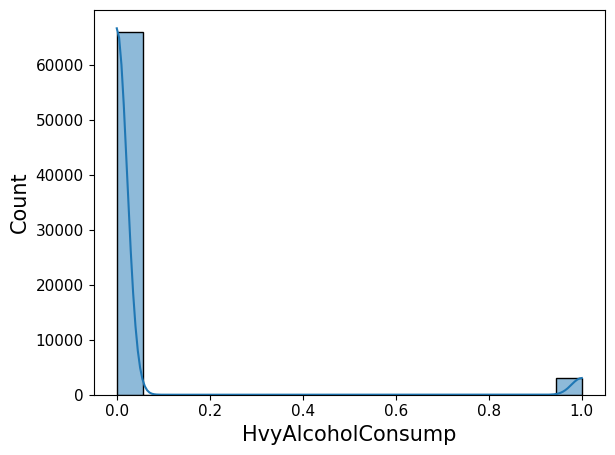

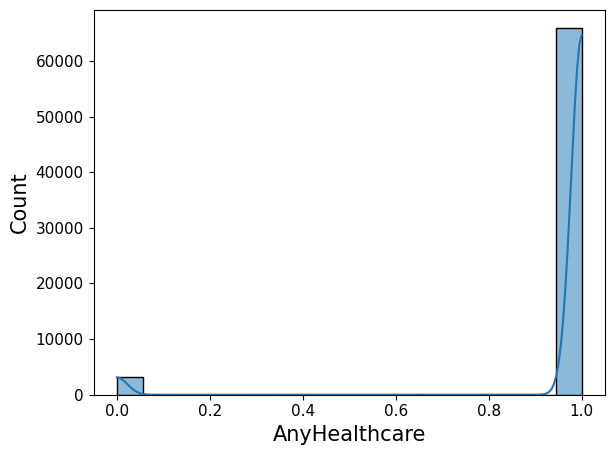

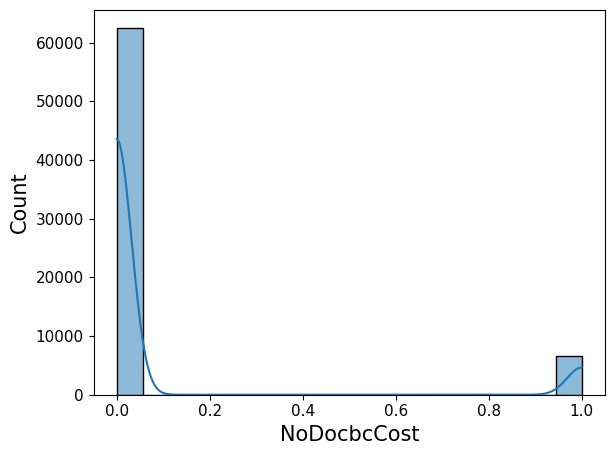

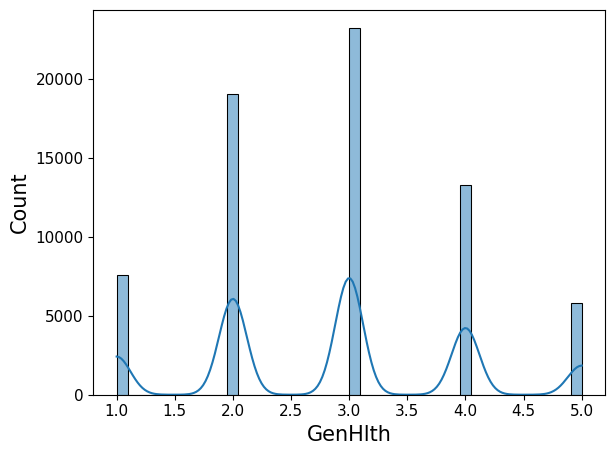

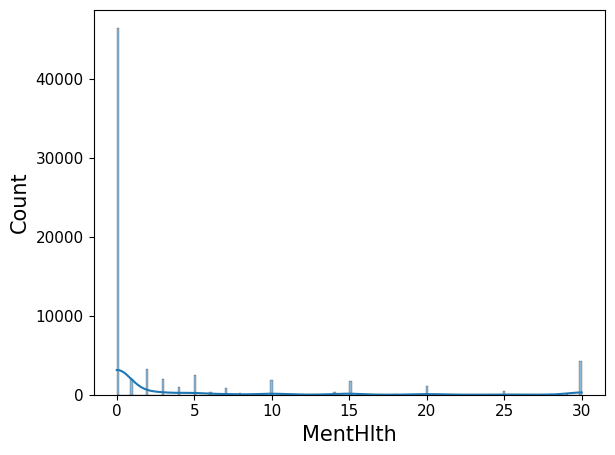

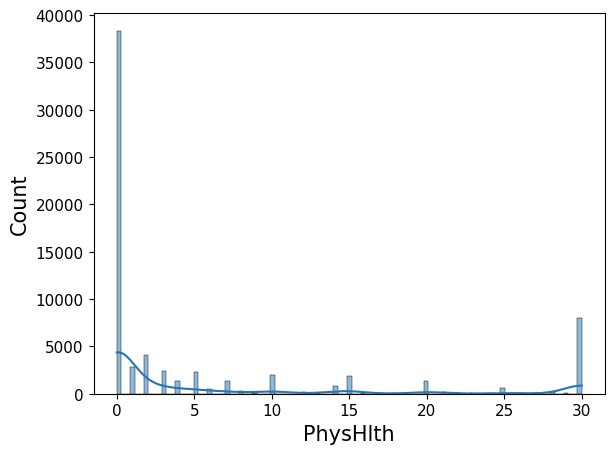

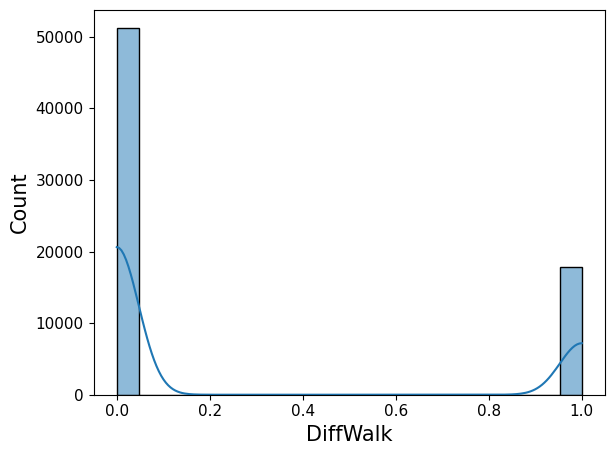

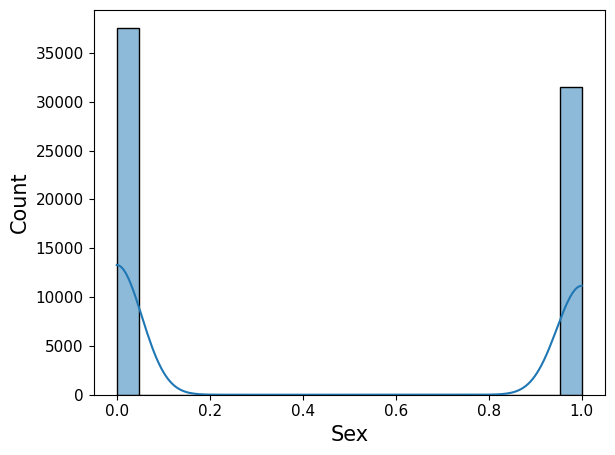

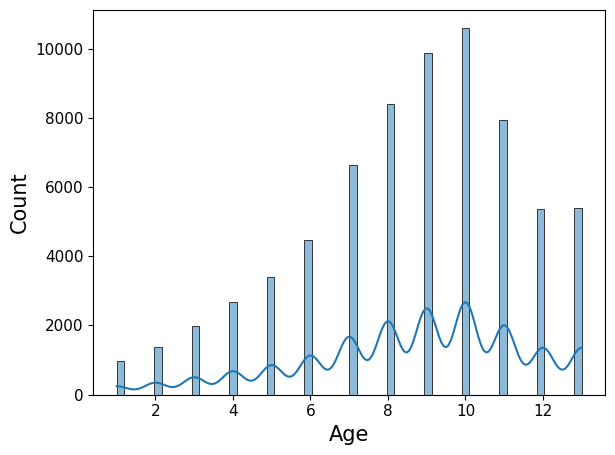

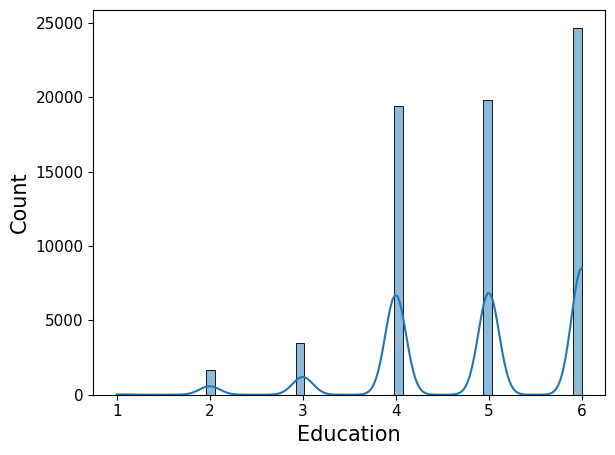

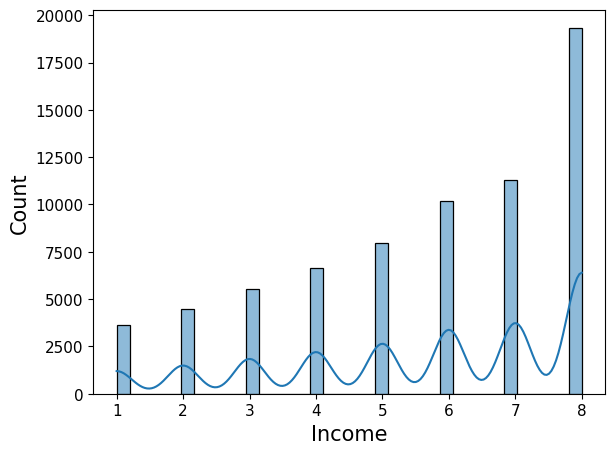

In [8]:
#plot biểu đồ phân phối
import seaborn as sns
for col in db.columns[:-1]:
    sns.histplot(db[col], kde=True)
    save_fig("BieuDoPhanPhoi")
    plt.show()

In [8]:
import seaborn as sns

In [6]:
#Hàm visualize_feature mà bạn đã viết giúp bạn trực quan hóa mối quan hệ giữa một 
# feature (biến đặc trưng) và cột target Diabetes_binary thông qua ba biểu đồ:
#Pie chart,Heatmap,Bar
def visualize_feature(feature_name):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots
    
    # Pie chart
    db[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'Pie Chart: {feature_name}')
    
    # Crosstab heatmap
    cross_tab = pd.crosstab(db[feature_name], db['Diabetes'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes_binary (%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes_binary')
    plt.tight_layout()
    save_fig(f'Three_Chart_of{feature_name}')
    plt.show()

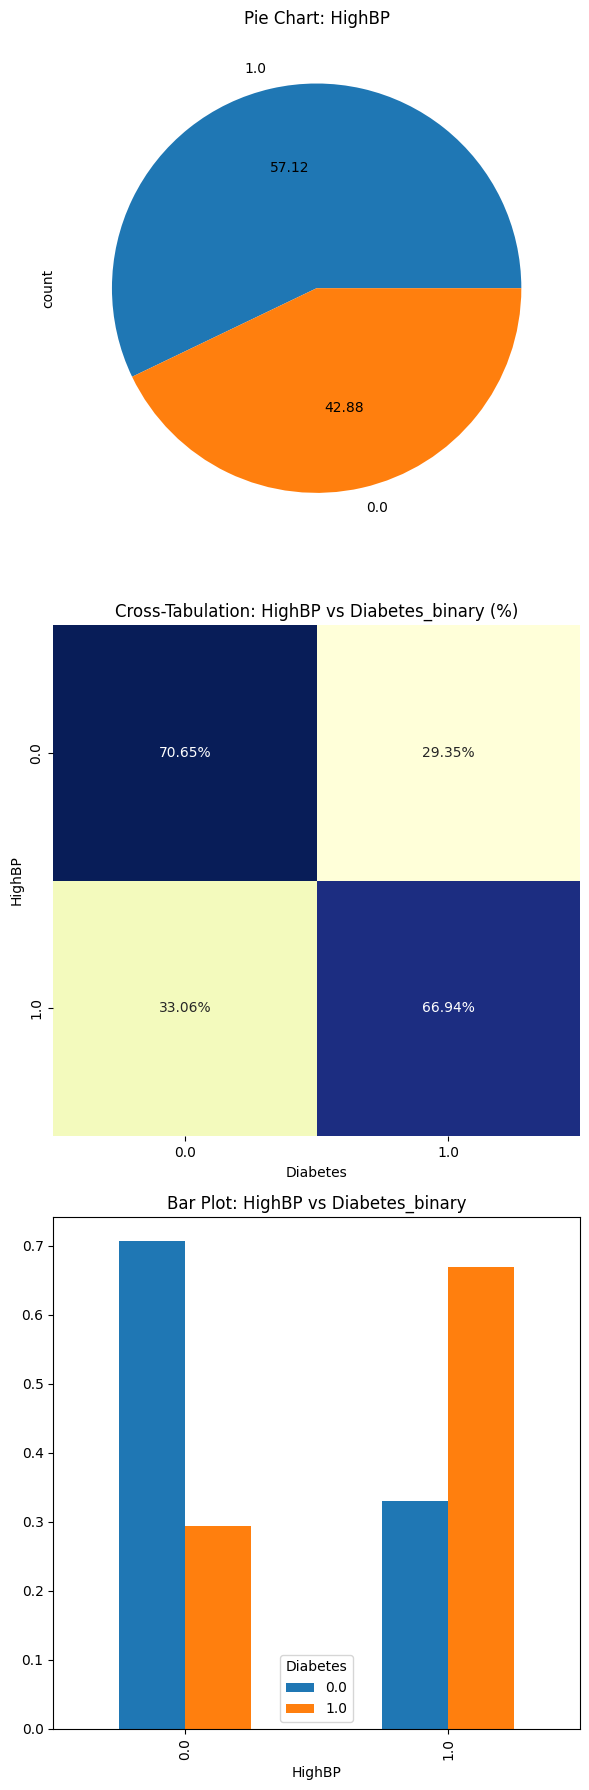

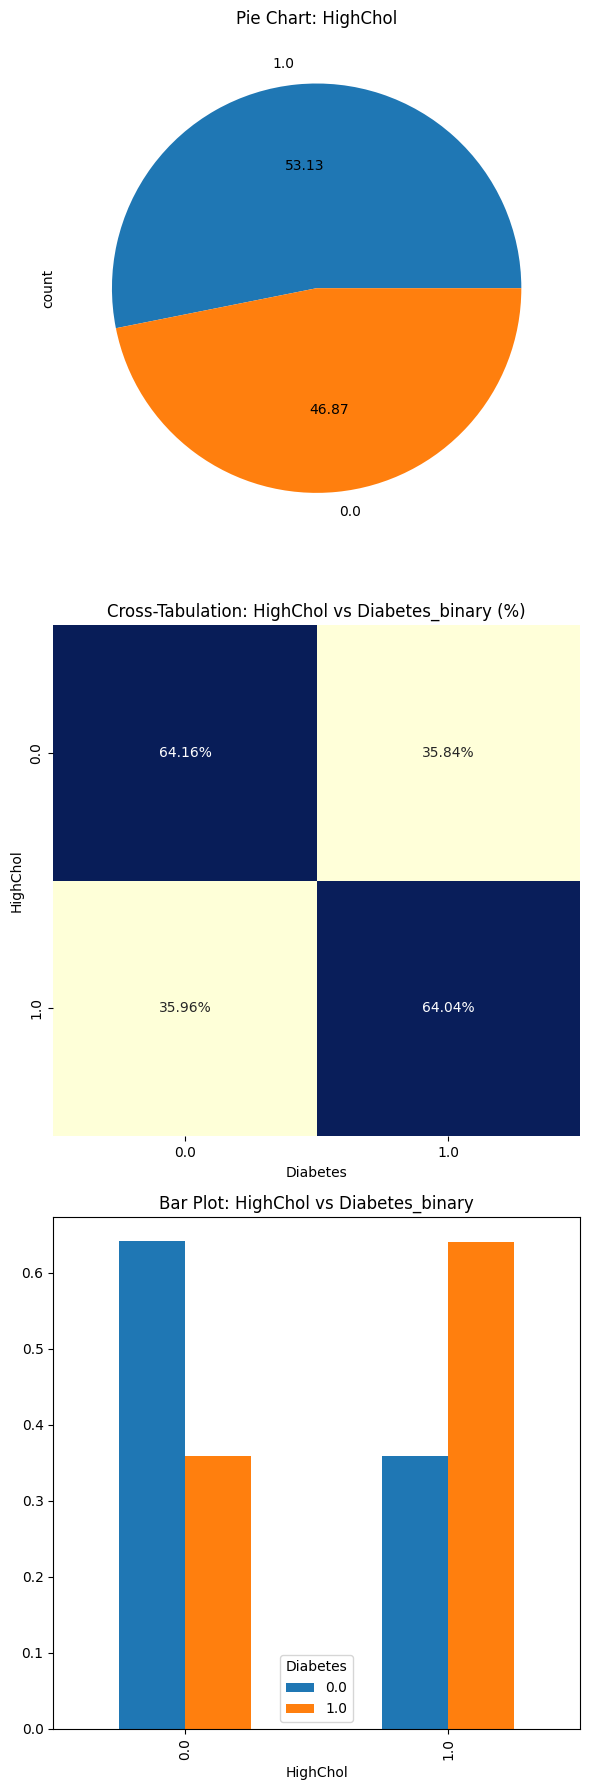

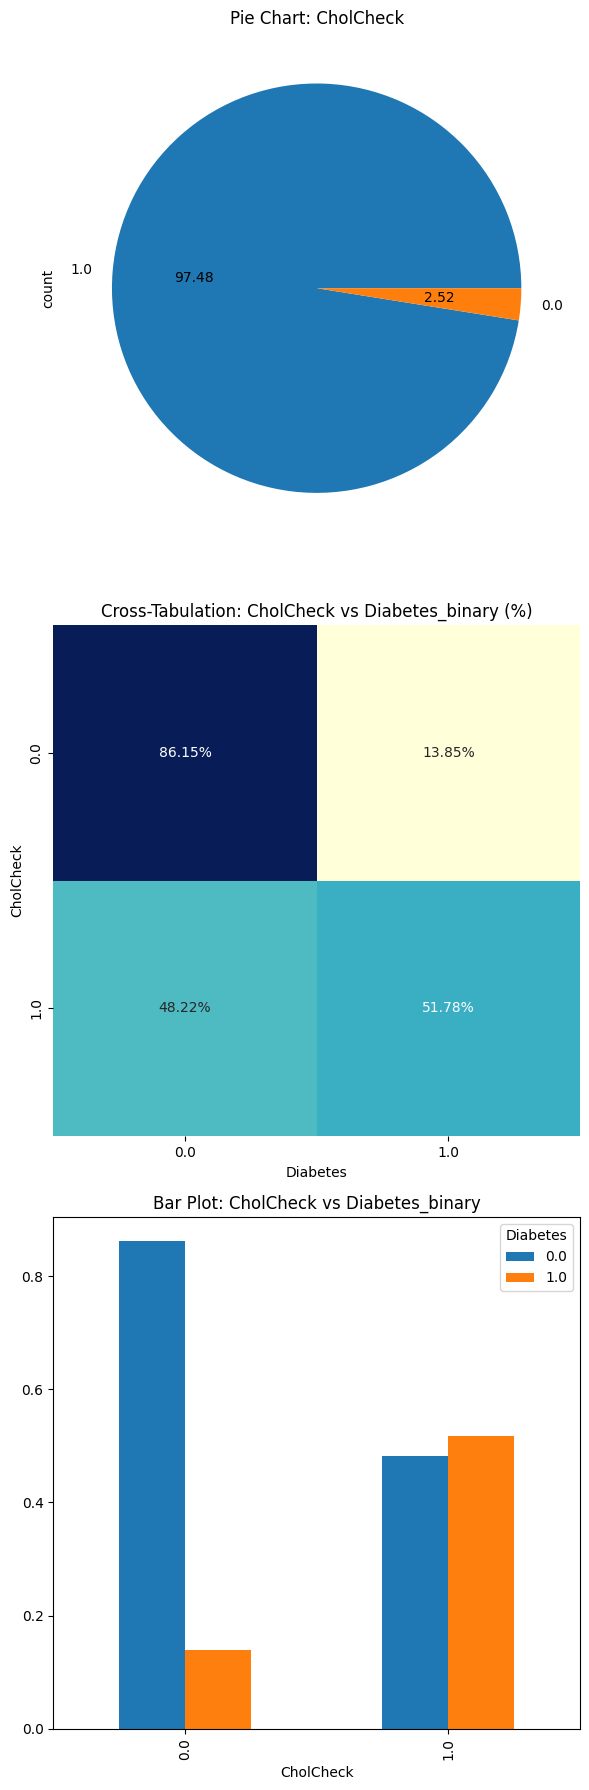

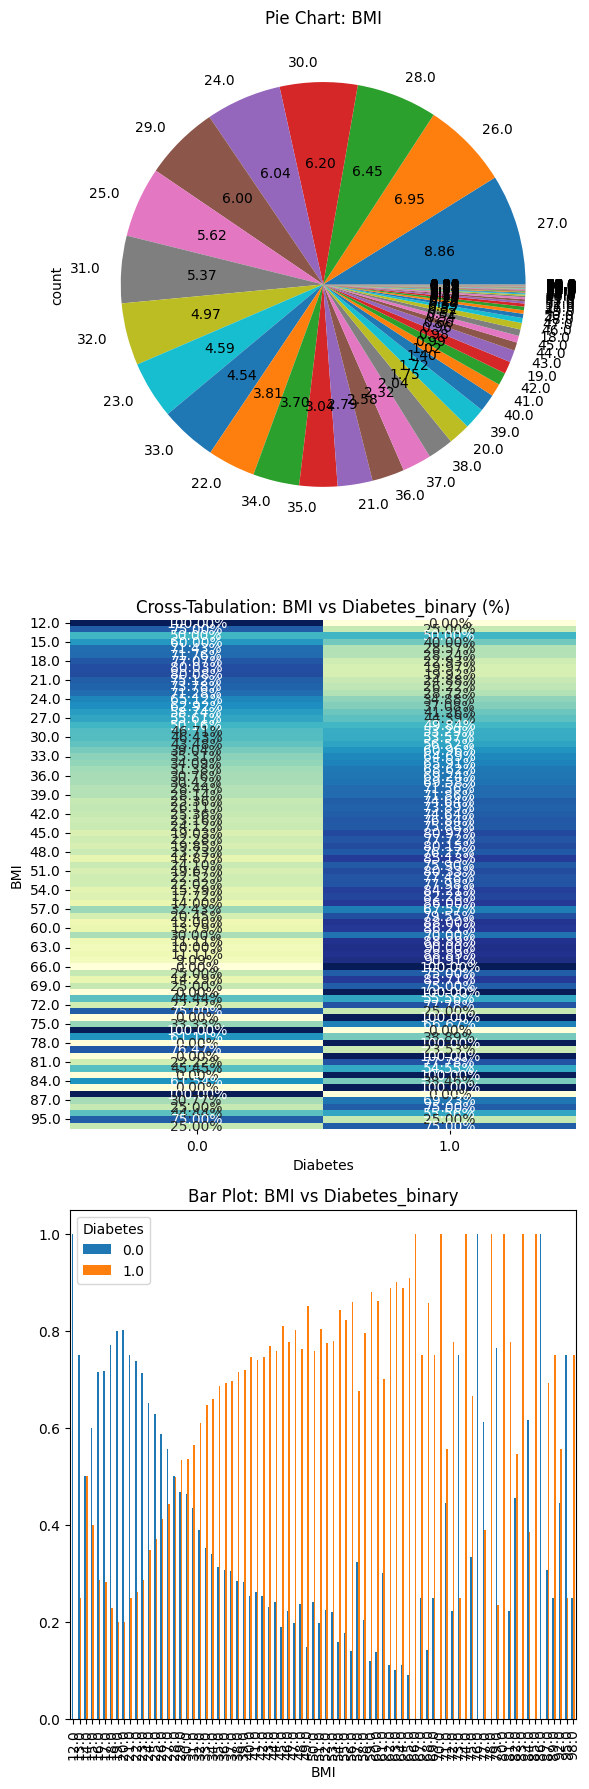

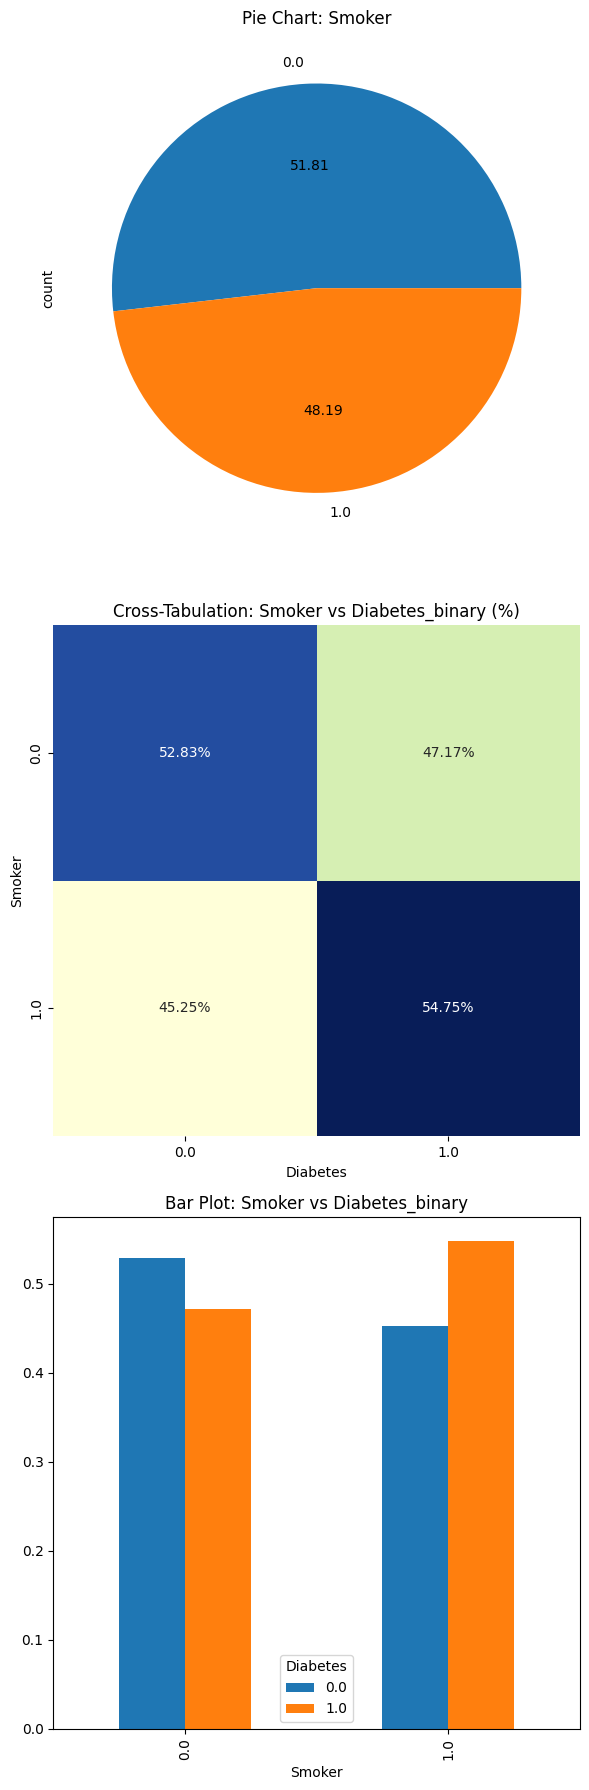

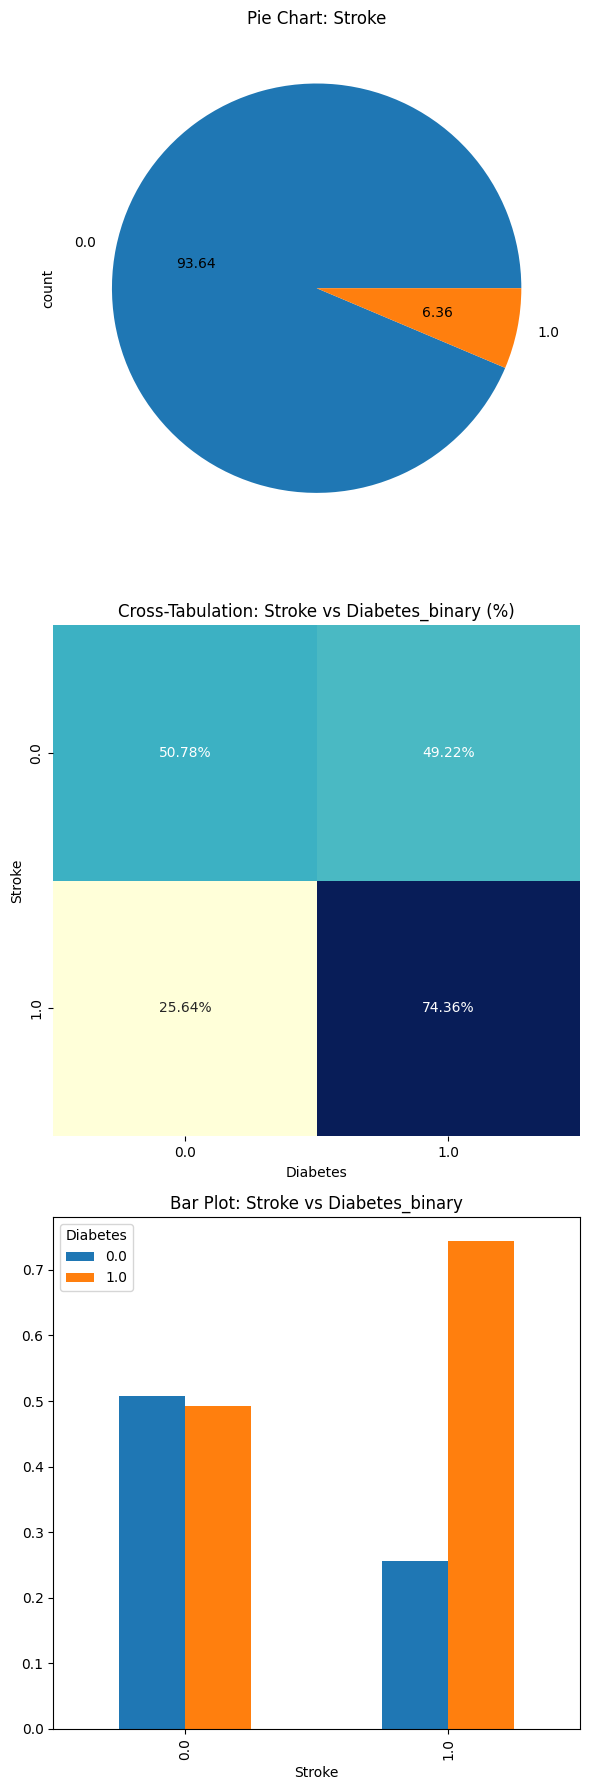

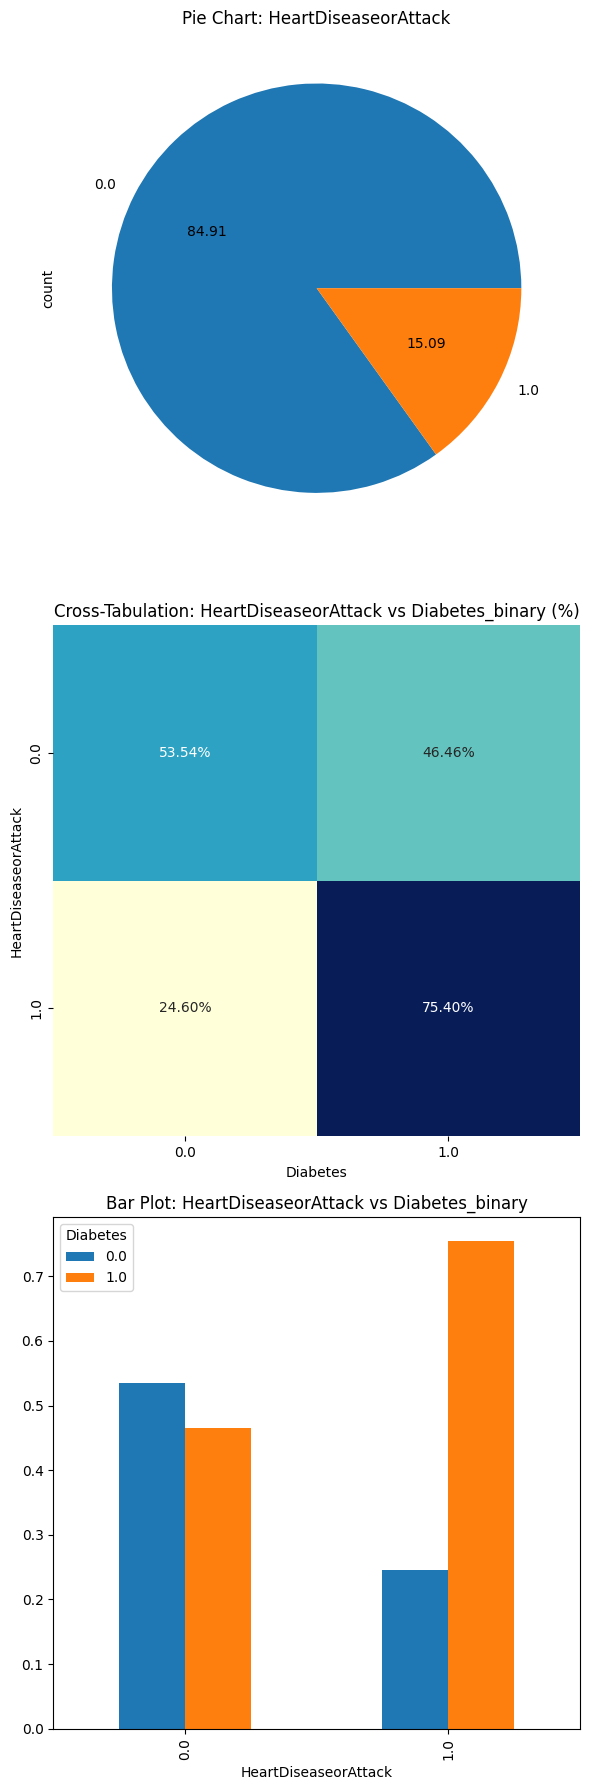

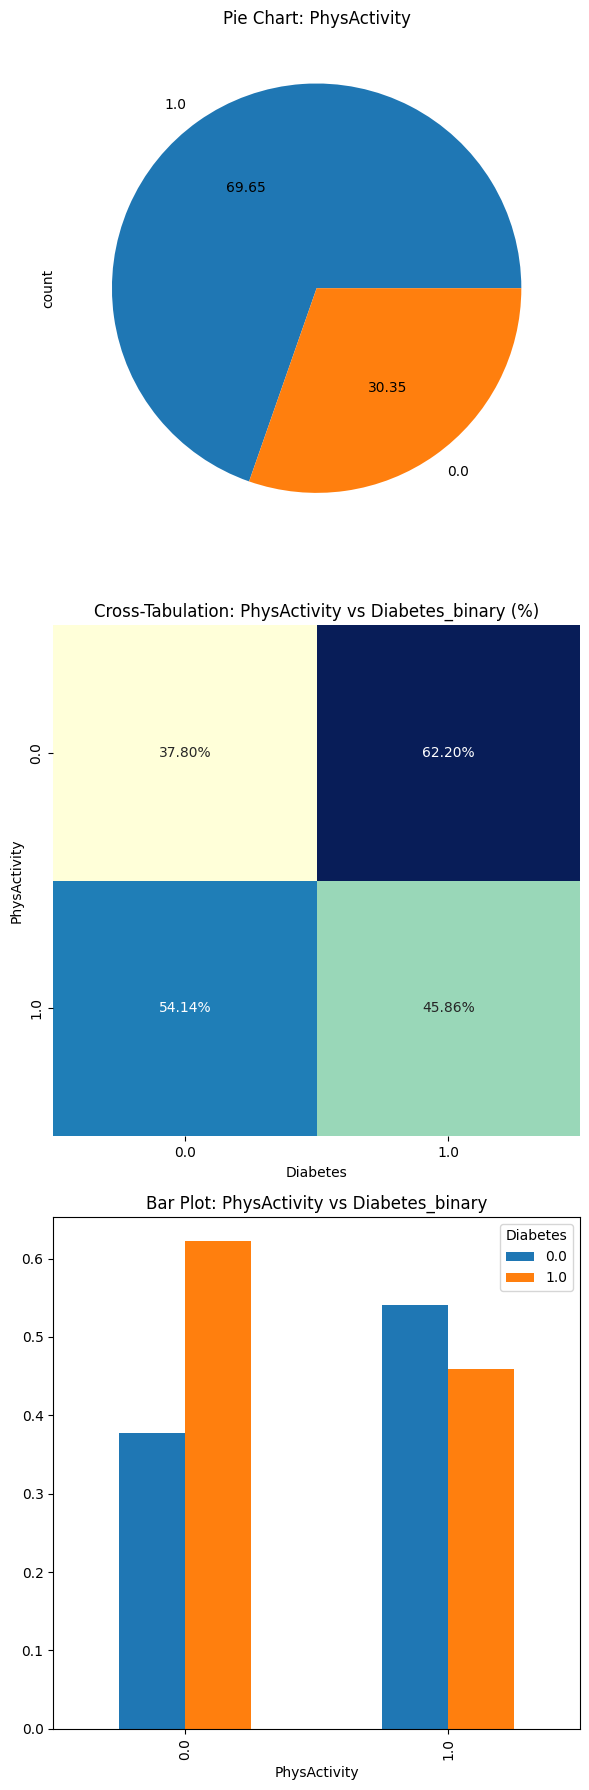

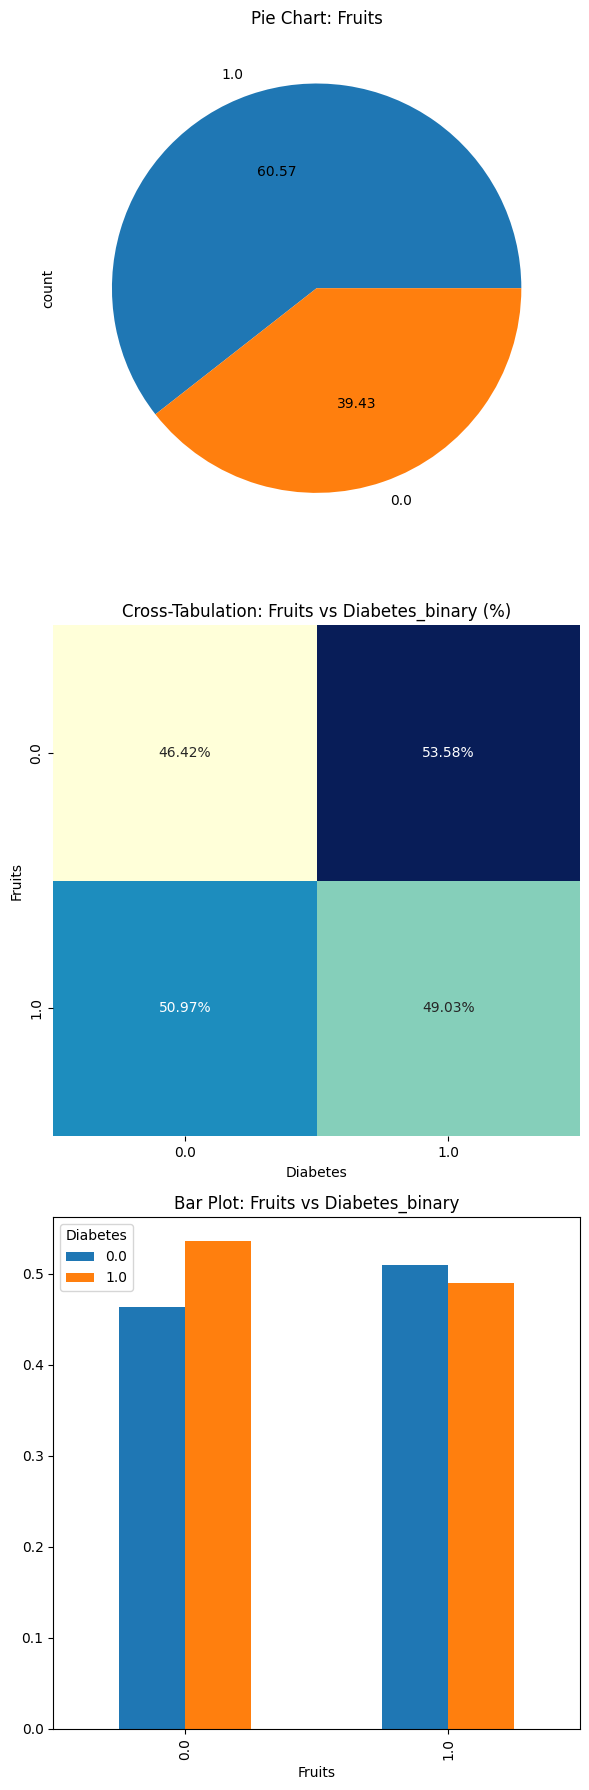

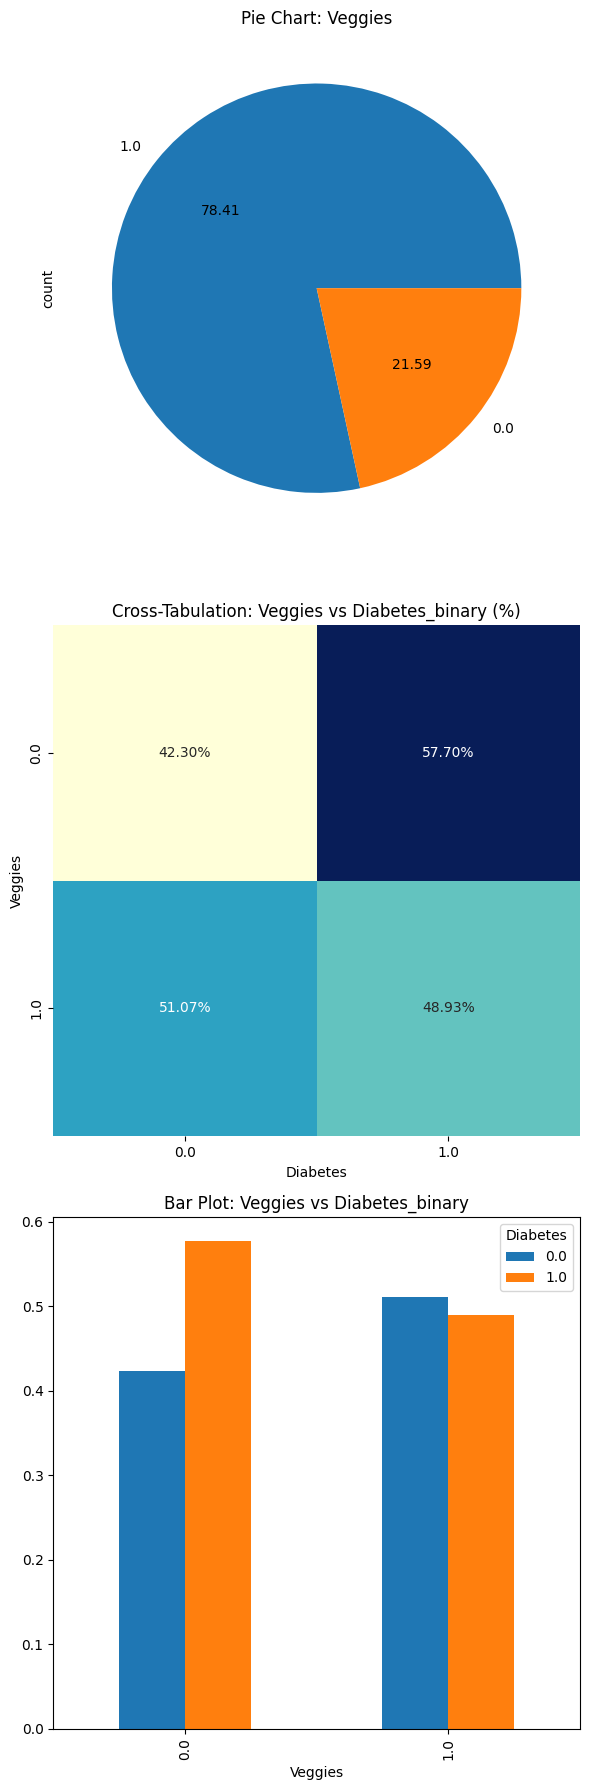

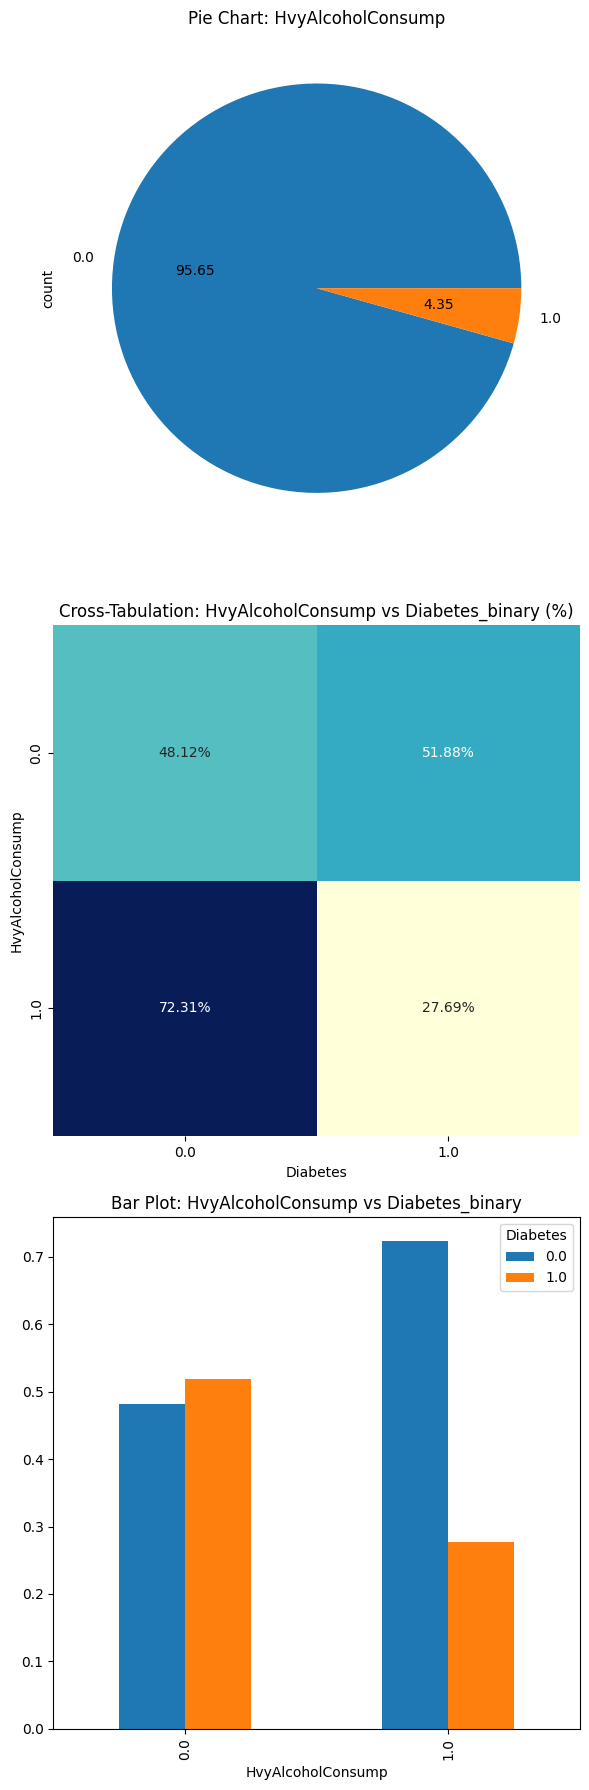

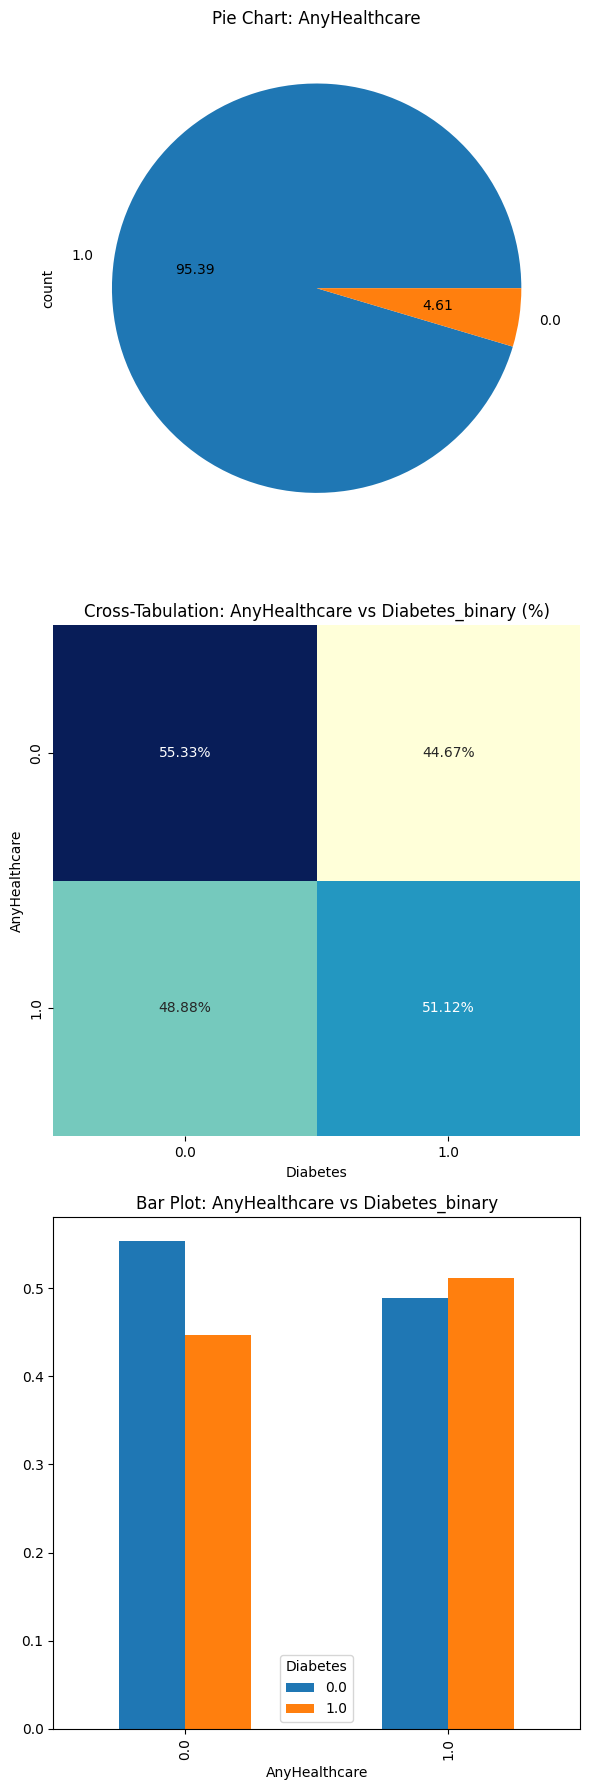

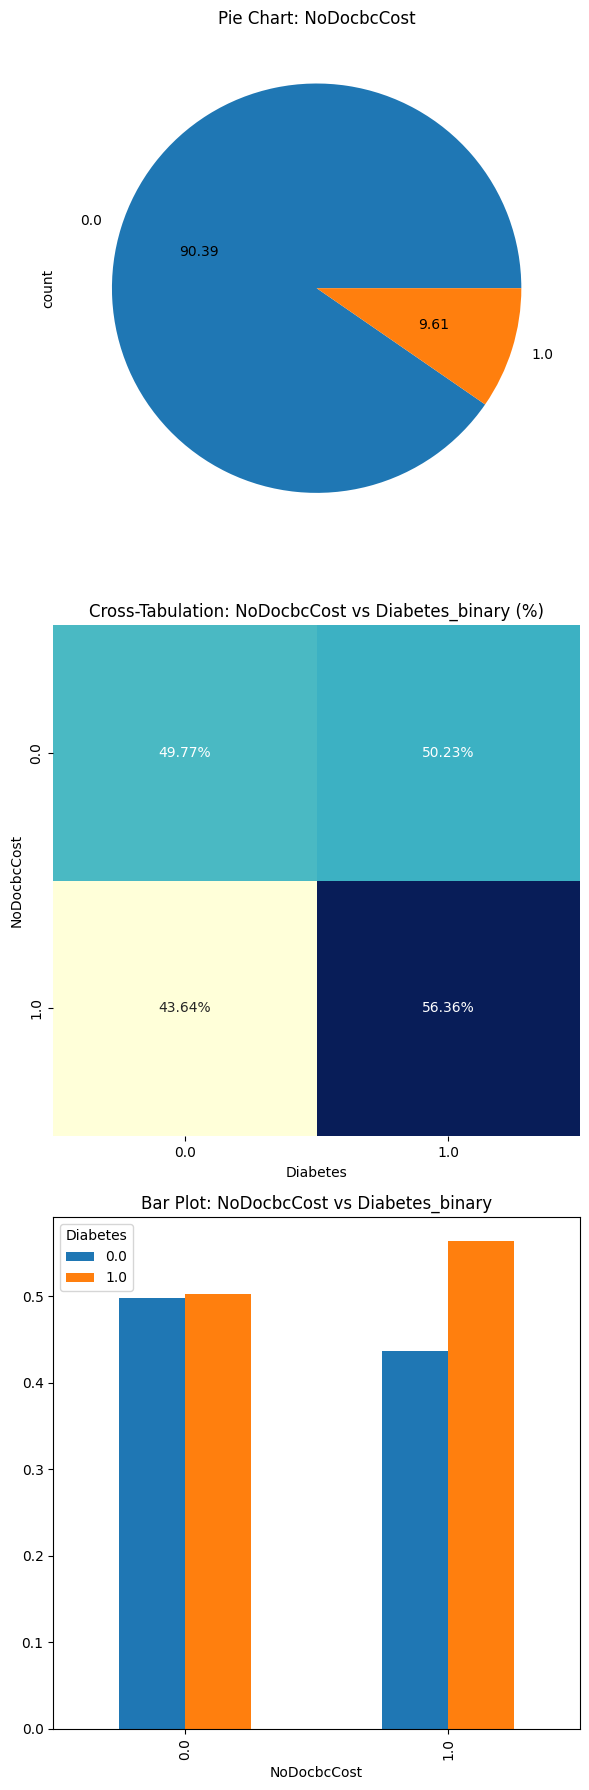

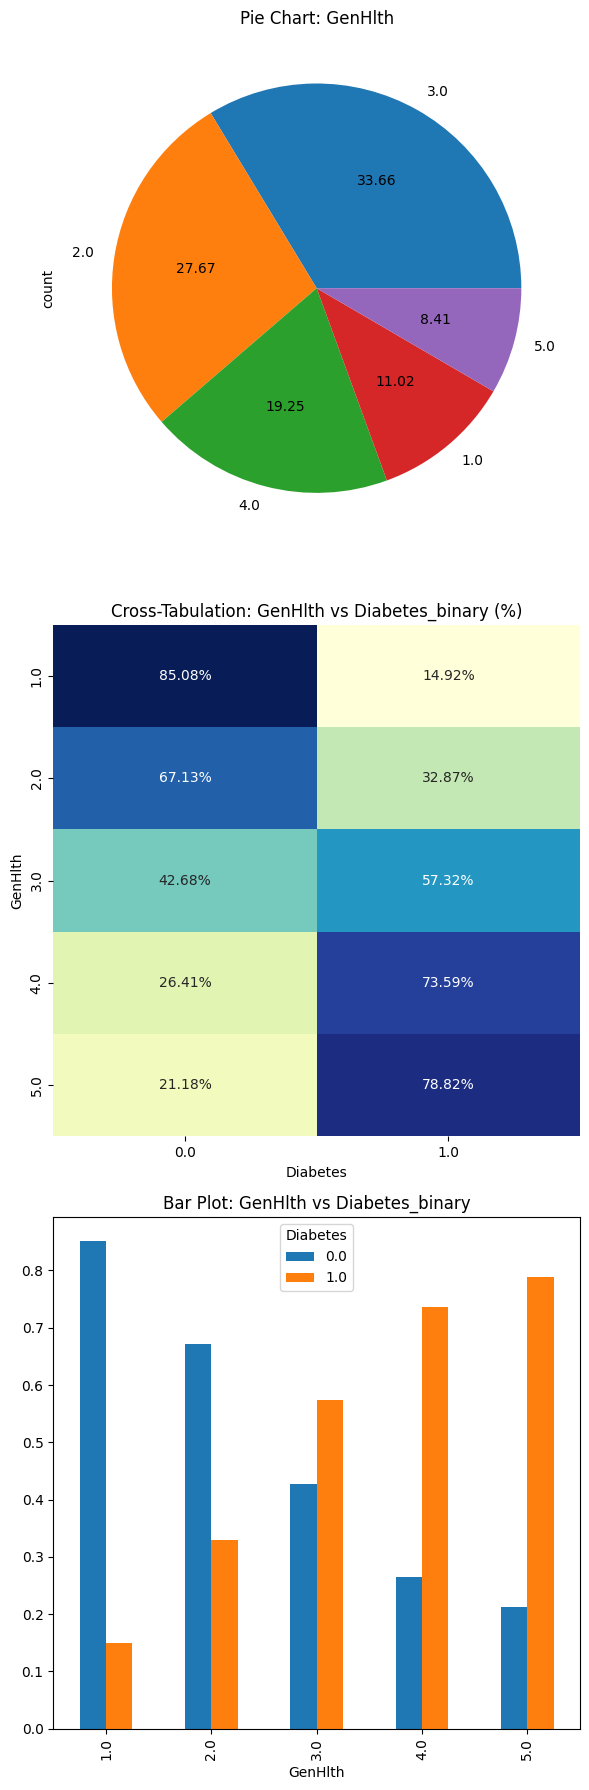

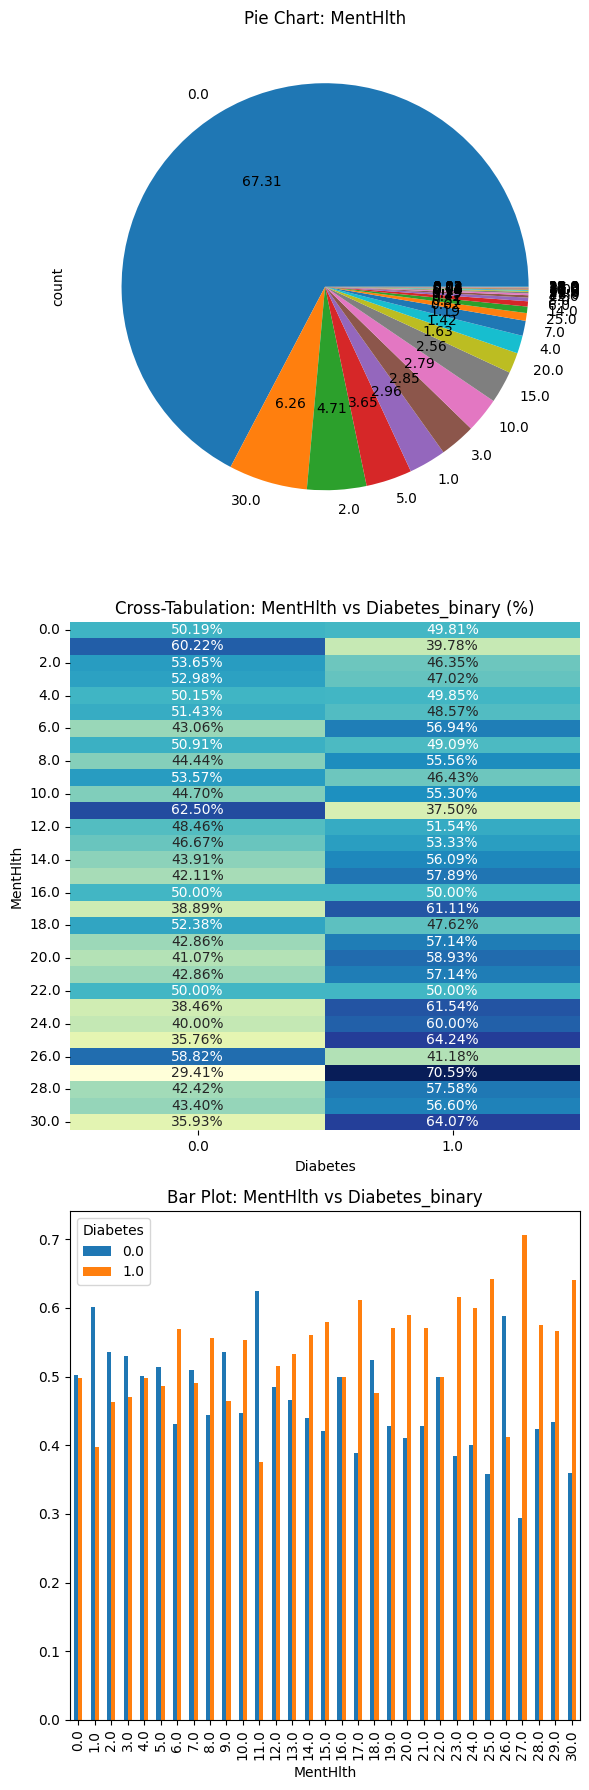

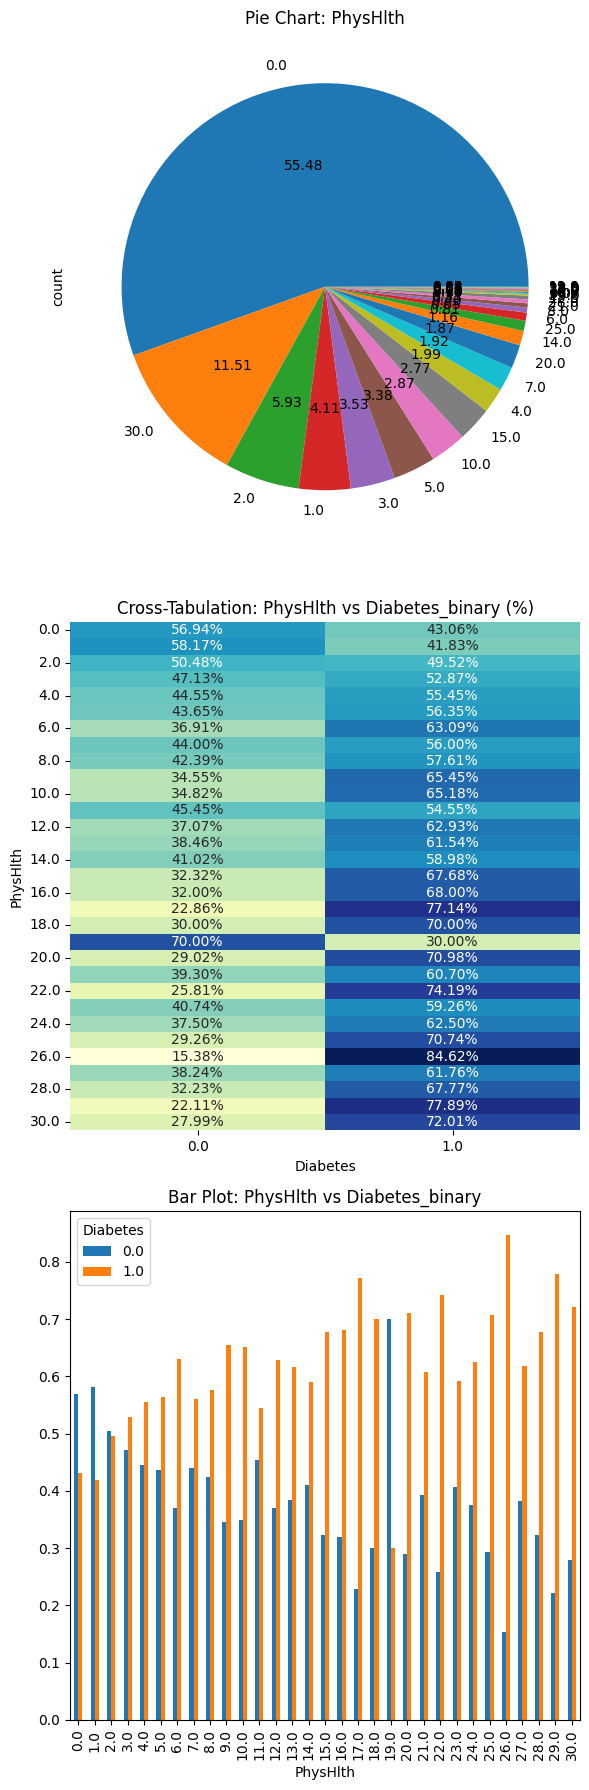

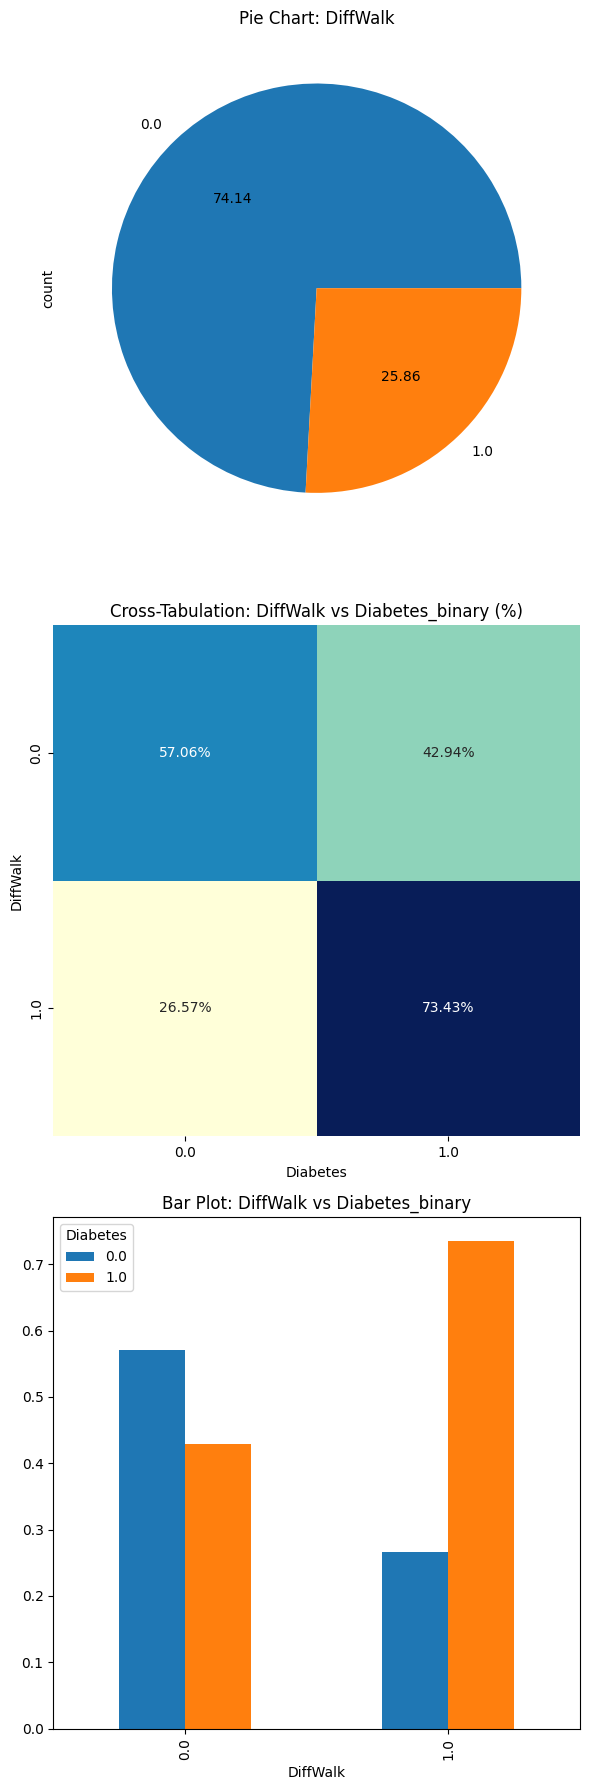

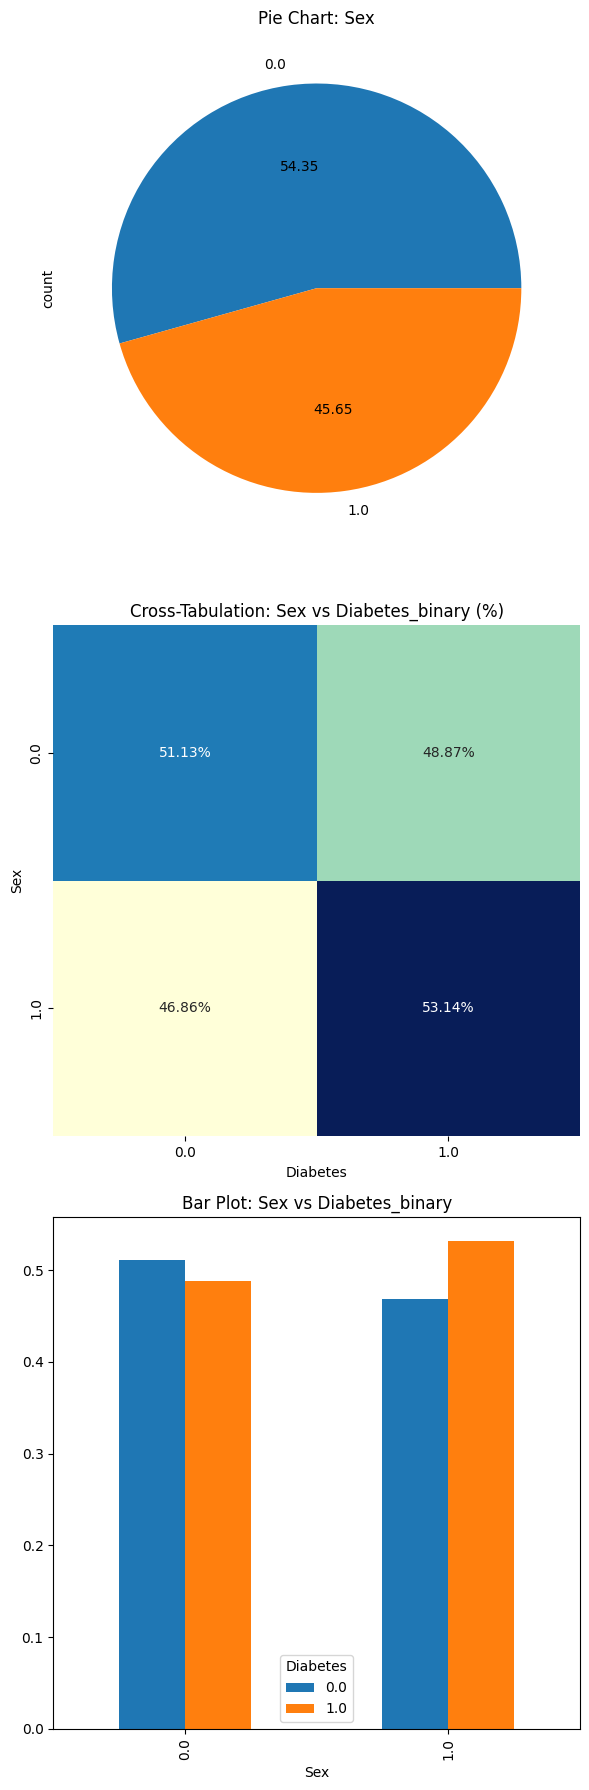

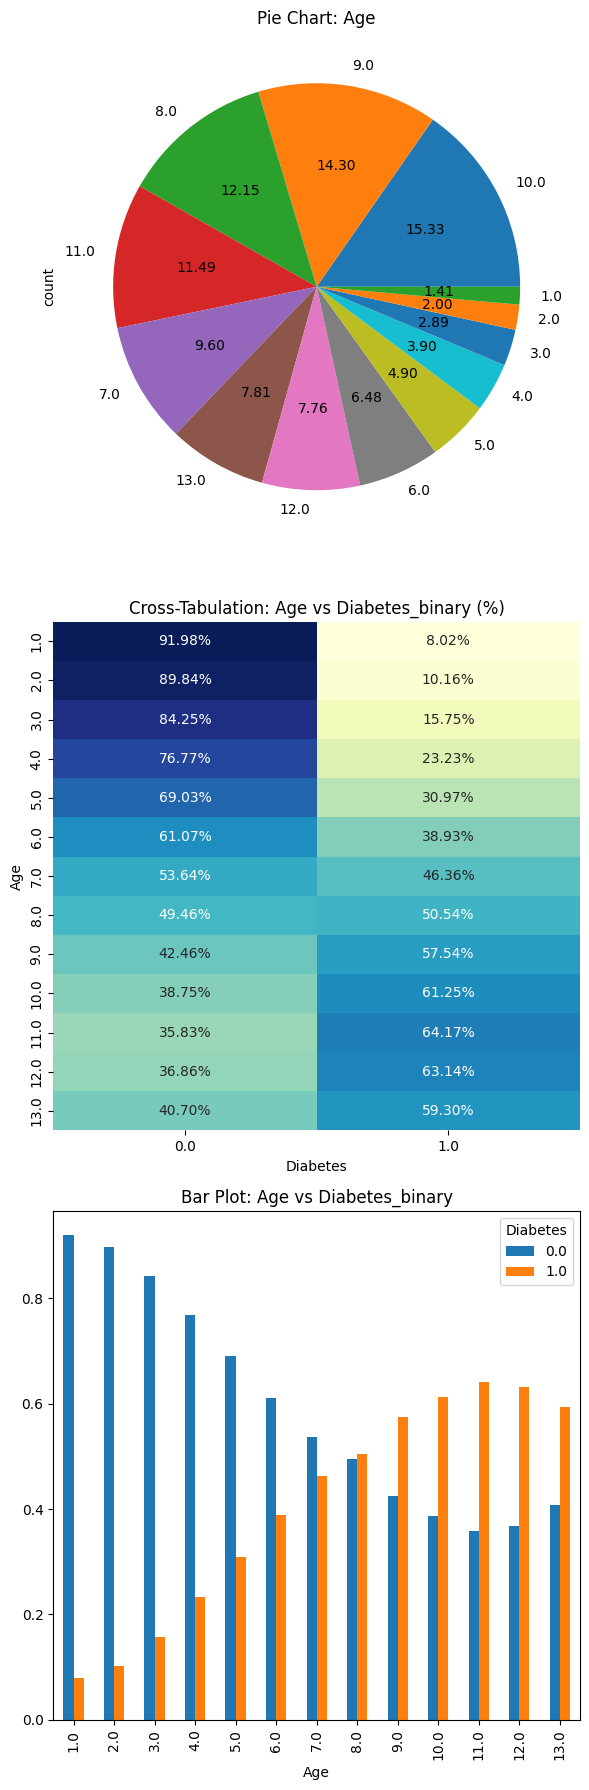

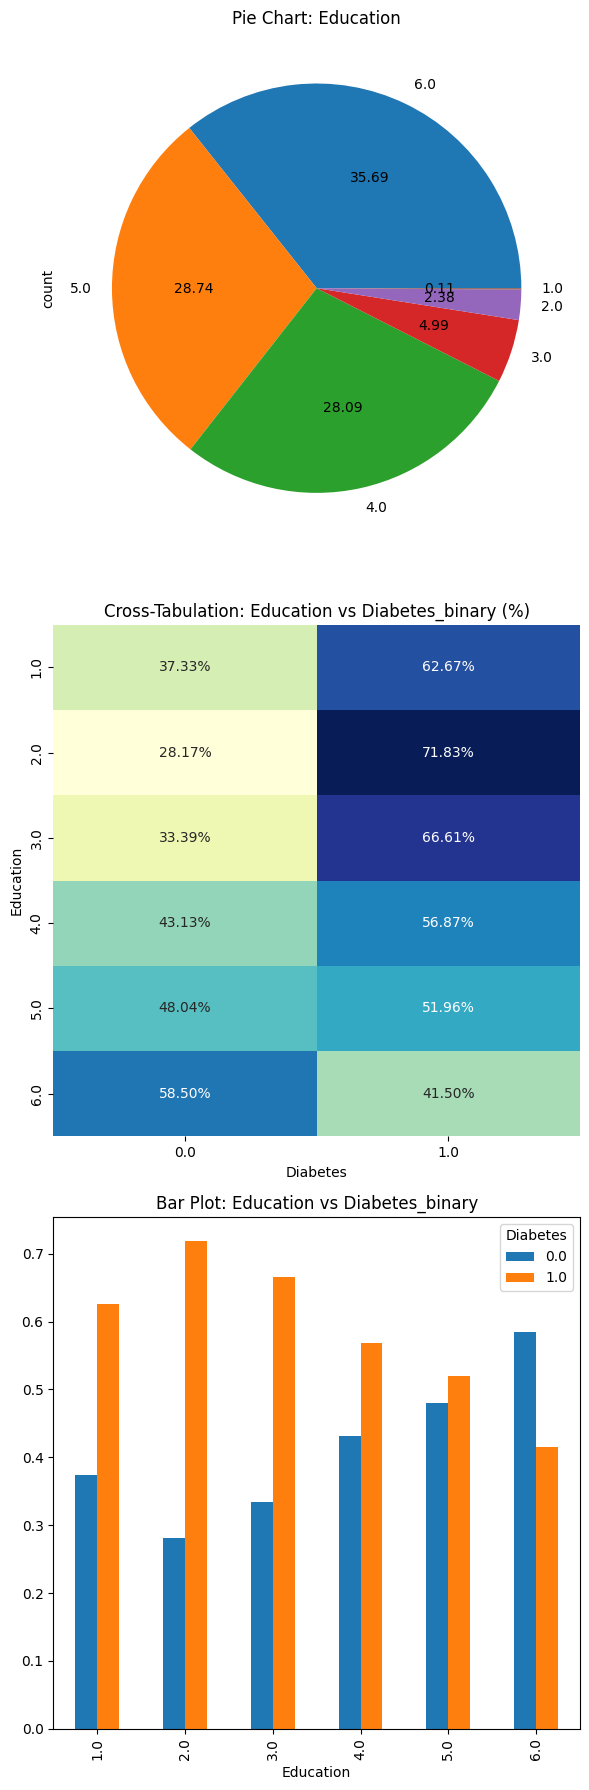

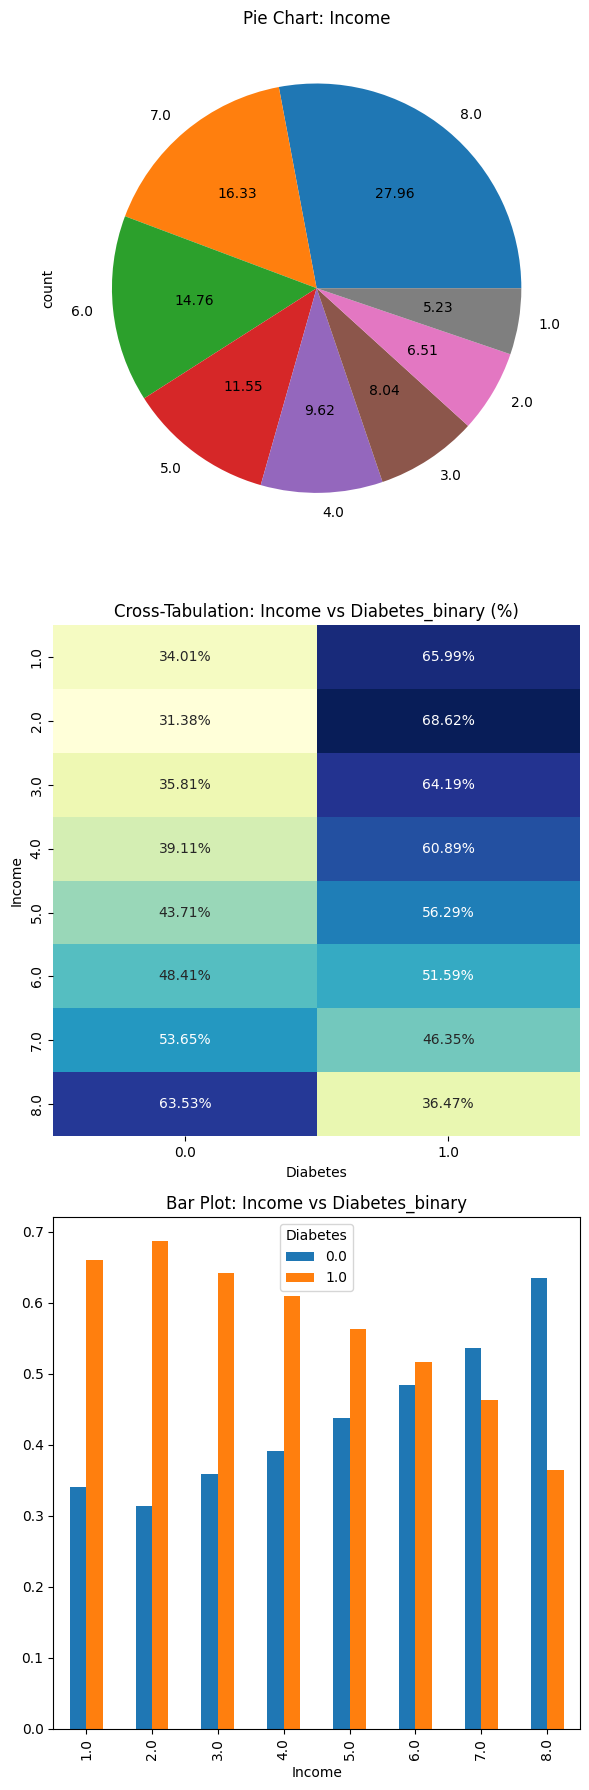

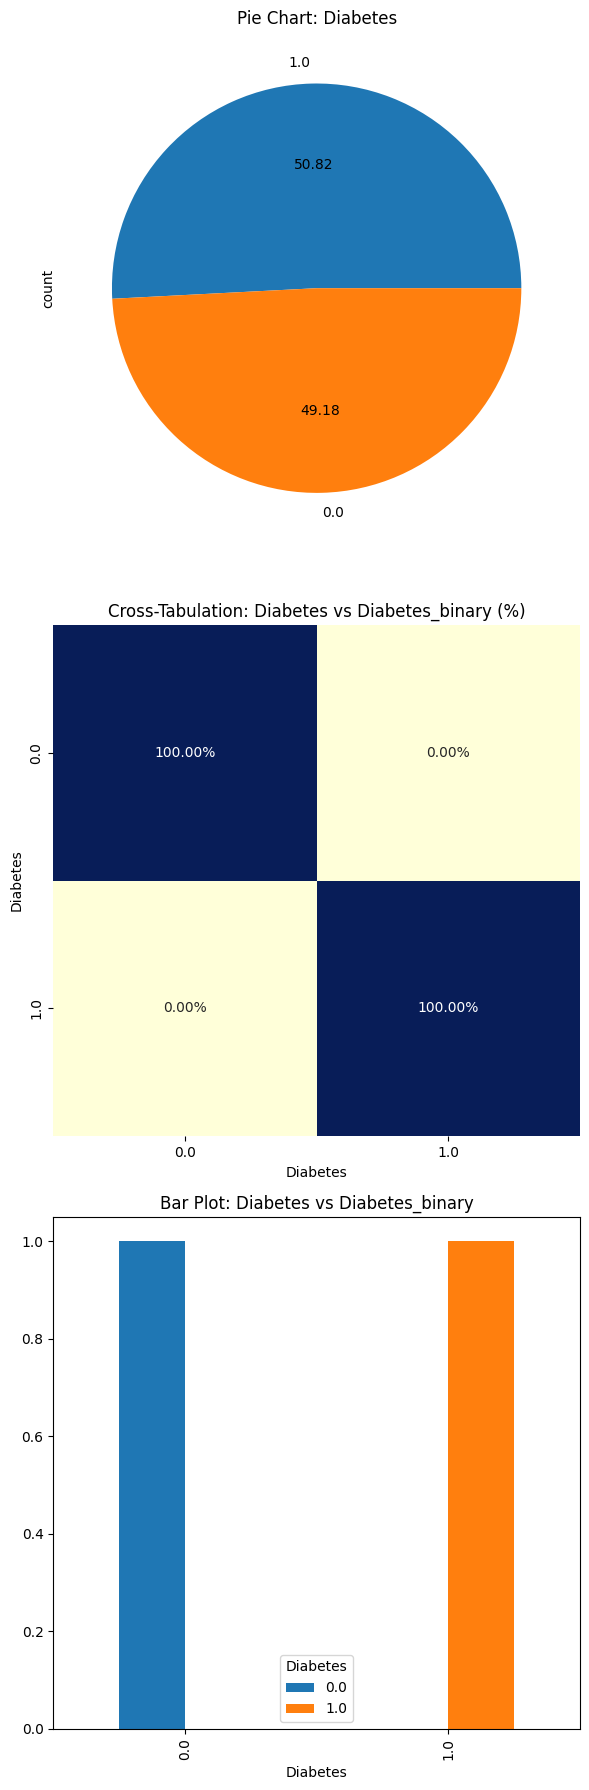

In [9]:
for i in db.columns:
    visualize_feature(i)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13104\737364195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=diabetes_corr.index, x=diabetes_corr['Diabetes'], palette="Greens_d")


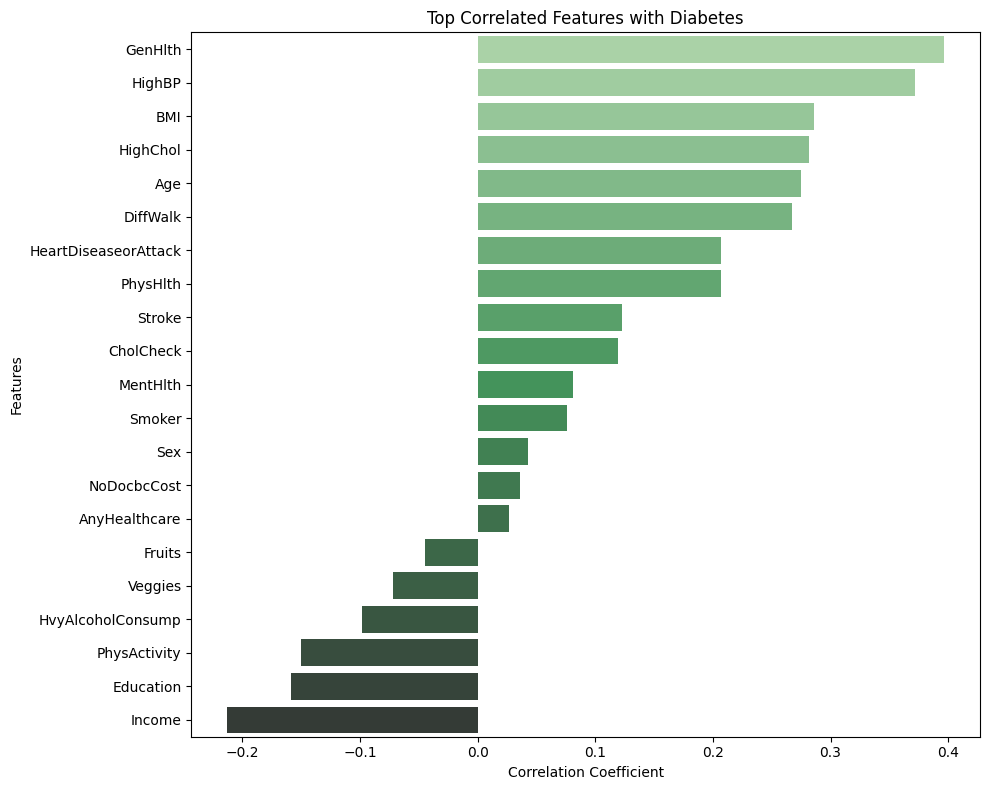

In [ ]:
##plot corr với diabetes with plot
plt.figure(figsize=(10, 8))
sns.barplot(y=diabetes_corr.index, x=diabetes_corr['Diabetes'], palette="Greens_d")
plt.title("Top Correlated Features with Diabetes")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
save_fig("Correlation_about_diabetes")
plt.show()

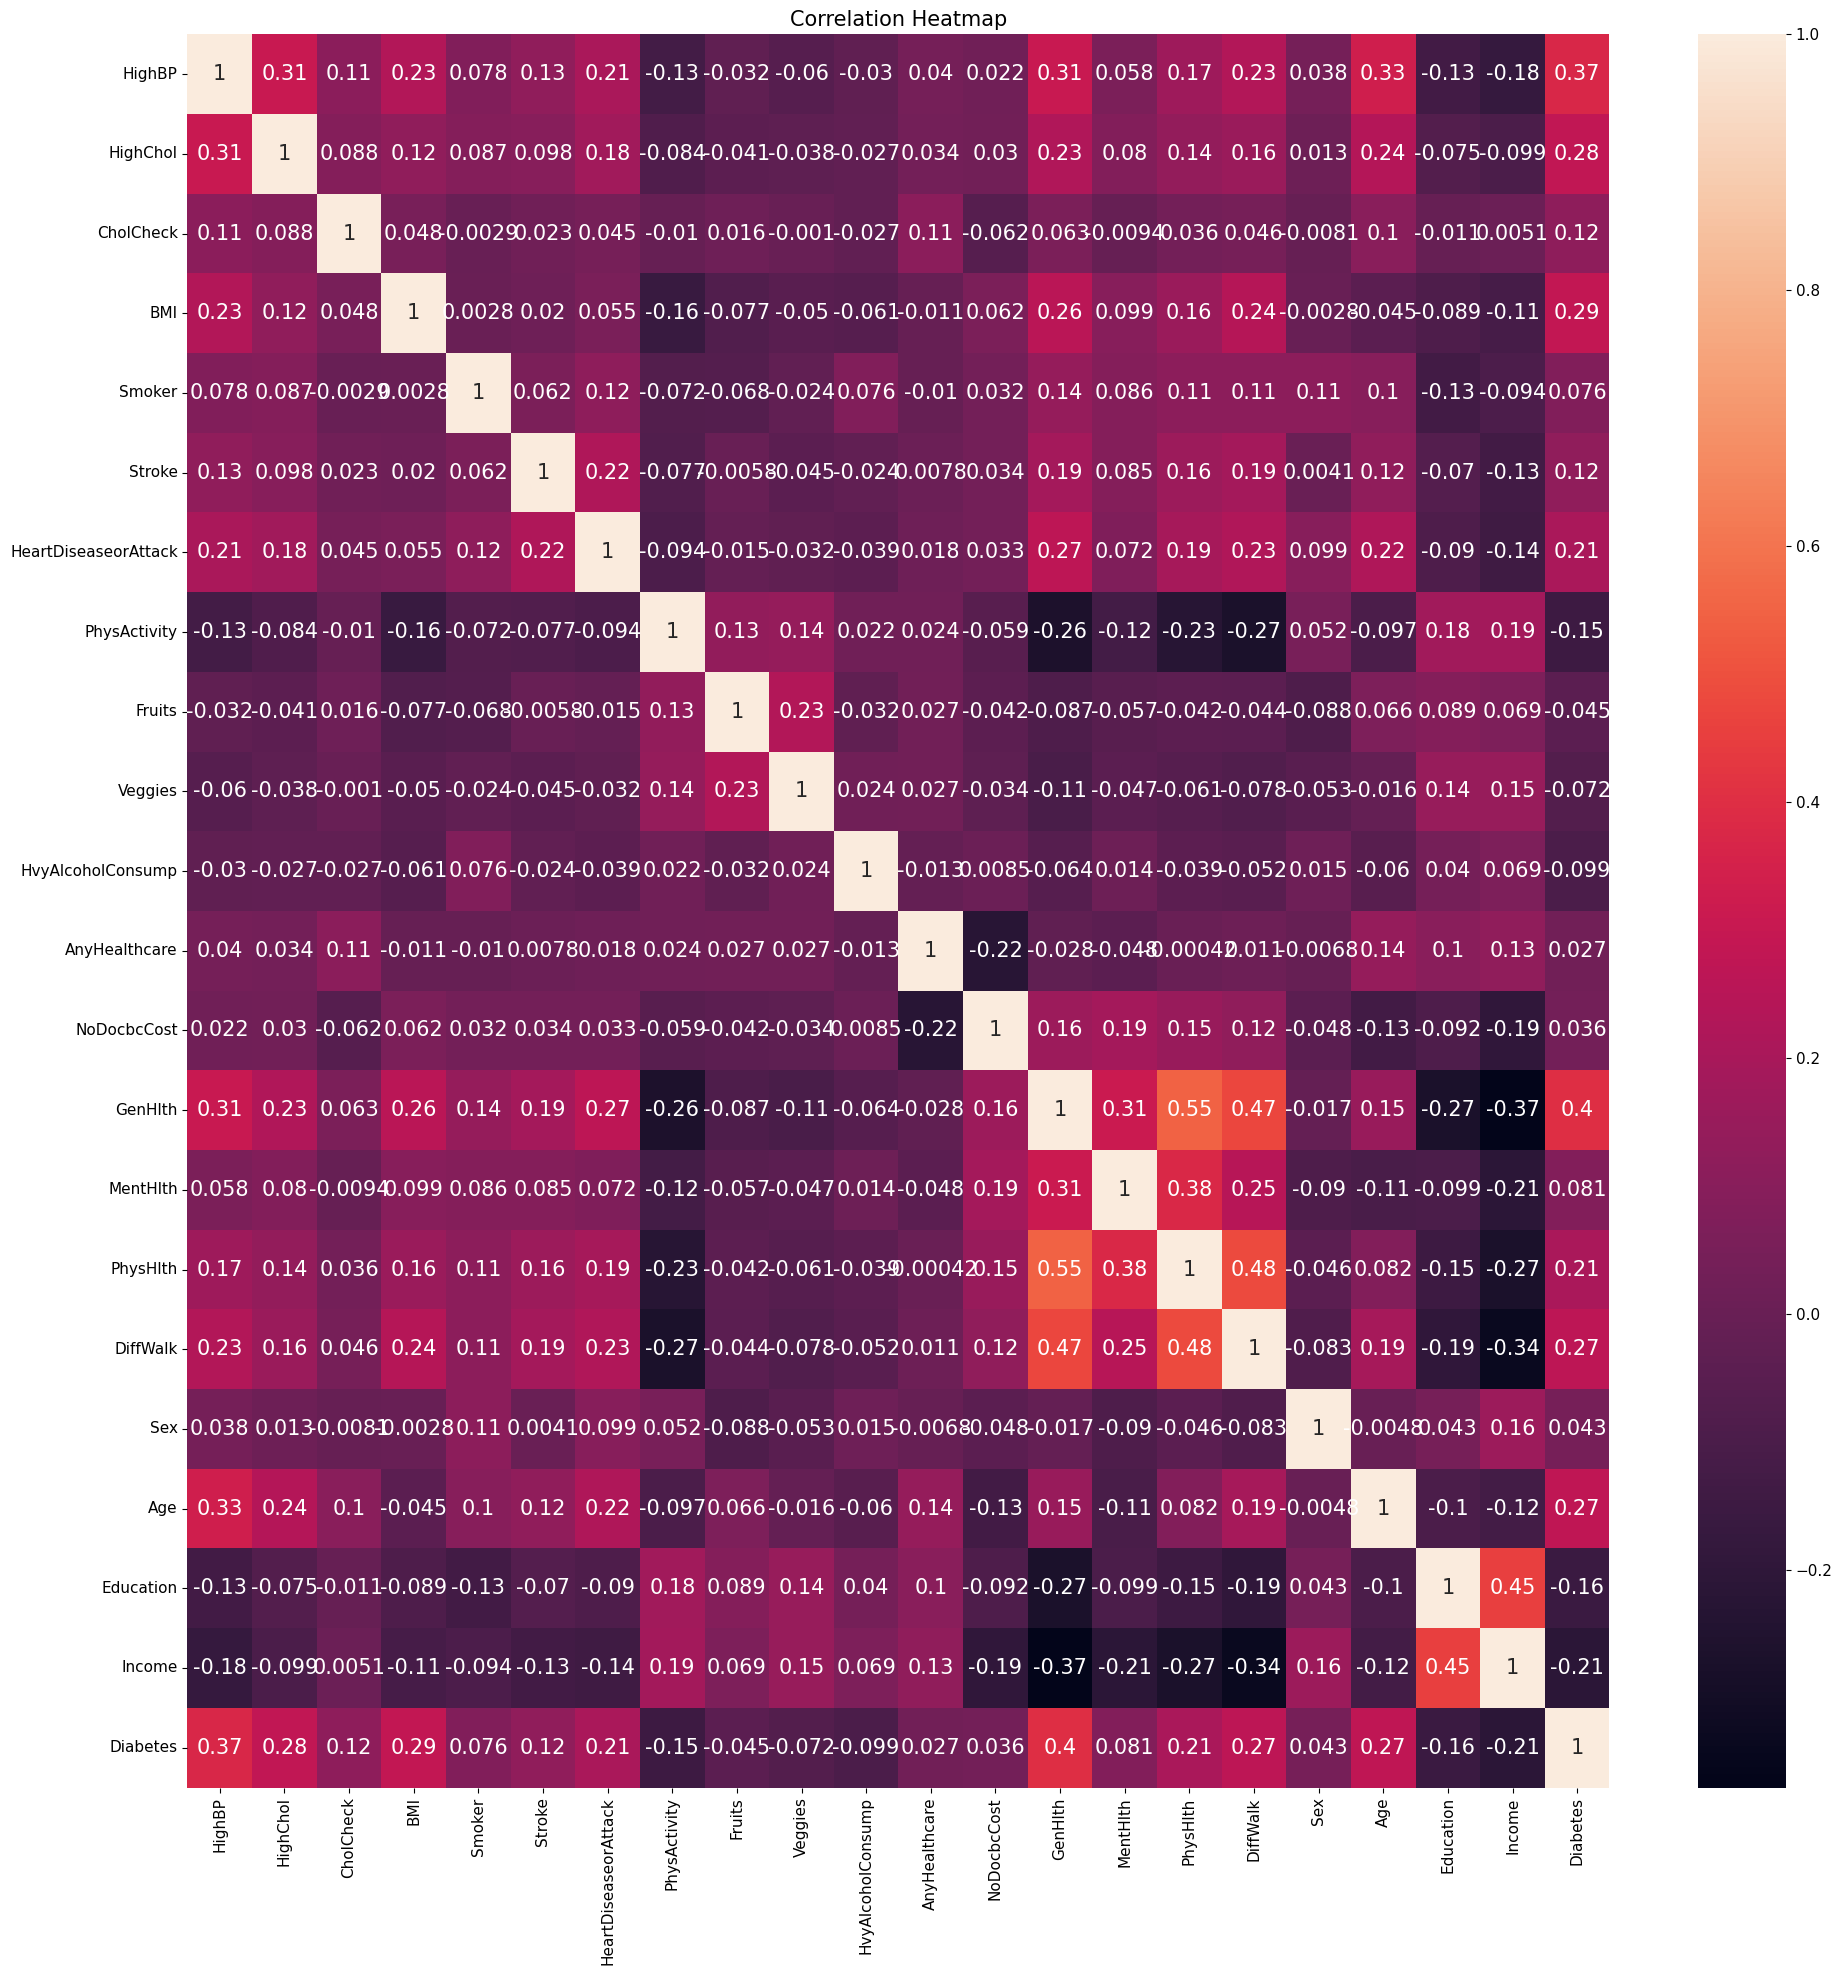

In [11]:
#plot corr mức độ tương tác lẫn nhau
plt.figure(figsize=(20,20))
sns.heatmap(db.corr(),annot=True).set_title('Correlation Heatmap')
save_fig("Correlation_Heatmap")
plt.show()